<div style="text-align: center;">
    <h1> <font style="bold"> Trabajo Pr√°ctico Final </font></h1>
    <h2><font style="bold">Especializaci√≥n en Inteligencia Artificial</font></h2>
    <h2><font style="bold">Probabilidad y Estadistica</font></h2>
    <h3><font style="bold">Abril Noguera - Carlos Rodr√≠guez - Jos√© Roberto Castro Delgado</font></h3>
</div>

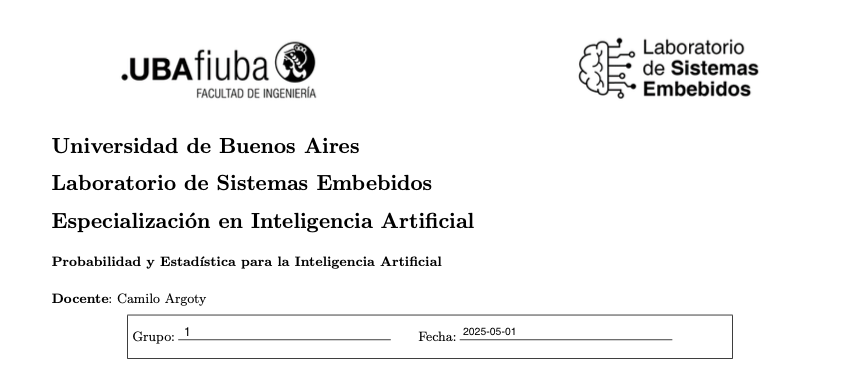

In [124]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import t as t_dist  # Utilizamos solo para comparar el p-valor y el valor cr√≠tico
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from matplotlib.cm import get_cmap
from statsmodels.distributions.empirical_distribution import ECDF

In [125]:
# Cargamos las dos hojas como DataFrames
df_santa_ana = pd.read_excel('Datos.xlsx', sheet_name='Santa Ana')
df_santa_ana['Tienda'] = 'Santa Ana'
df_la_floresta = pd.read_excel('Datos.xlsx', sheet_name='La Floresta')
df_la_floresta['Tienda'] = 'La Floresta'

df = pd.concat([df_santa_ana, df_la_floresta], ignore_index=True)

In [126]:
# Procesamiento de la variable 'Fecha'
df['Fecha'] = pd.to_datetime(df['Fecha'])

df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.weekday
df['DiaSemana'] = df['Fecha'].dt.dayofweek
dias = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
df['DiaNombre'] = df['DiaSemana'].map(dias)

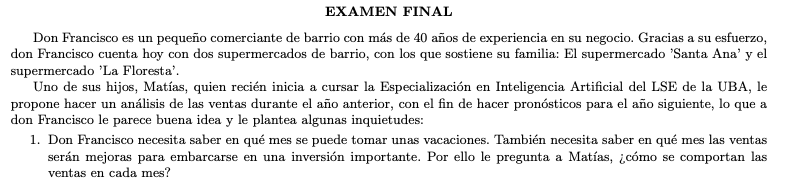

In [127]:
# Agrupamos por Mes y Tienda, sumando ventas
tabla_ventas = df.groupby(['Mes', 'Tienda'])['Ventas'].sum().unstack()

# Agregamos la columna 'Total' sumando Santa Ana + La Floresta
tabla_ventas['Total'] = tabla_ventas.sum(axis=1)

# Mostramos la tabla final
print(tabla_ventas)

Tienda  La Floresta  Santa Ana      Total
Mes                                      
1         564909.44  531254.37 1096163.81
2         555204.34  537654.75 1092859.09
3         716058.88  669986.03 1386044.91
4         629416.39  599332.09 1228748.47
5         657326.06  656018.80 1313344.86
6         697688.75  672495.24 1370184.00
7         693765.39  641277.32 1335042.71
8         734056.19  704267.47 1438323.66
9         707686.65  671577.42 1379264.07
10        723666.50  675875.98 1399542.48
11        684028.85  669108.98 1353137.84
12        662742.55  609789.19 1272531.74


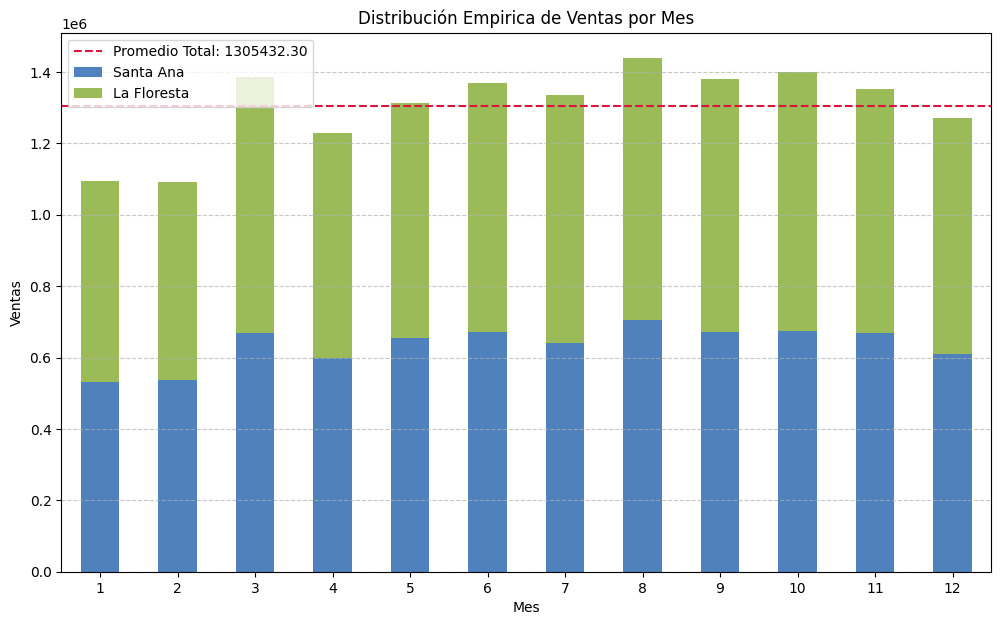

In [128]:
# Graficamos la tabla de ventas
colores = ['#4F81BD', '#9BBB59']

tabla_ventas[['Santa Ana', 'La Floresta']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color=colores
)

# Agregamos la l√≠nea de promedio
promedio_total = tabla_ventas['Total'].mean()
plt.axhline(y=promedio_total, color='crimson', linestyle='--', label=f'Promedio Total: {promedio_total:.2f}')

# Mejoramos el gr√°fico
plt.title("Distribuci√≥n Empirica de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos
plt.show()

A partir del an√°lisis de las ventas mensuales, se observ√≥ que los **meses de menores ventas** fueron **enero** y **febrero**, con ventas totales aproximadas de **1.096.164 d√≥lares** y **1.092.859 d√≥lares** respectivamente, valores muy similares y claramente por debajo del promedio anual de **1.305.432 d√≥lares**.

Por otro lado, se identificaron dos momentos de **ventas m√°ximas**: el primero en **marzo**, con aproximadamente **1.386.045 d√≥lares** en ventas, y el segundo, a√∫n m√°s elevado, en **agosto**, alcanzando un total de **1.438.324 d√≥lares**.

En base a estos resultados, se recomienda a Don Francisco considerar **enero o febrero** como los meses m√°s adecuados para tomar vacaciones, dado que representan los per√≠odos de menor actividad comercial. Asimismo, **marzo** y especialmente **agosto** surgen como los momentos m√°s convenientes para **realizar inversiones importantes**, coincidiendo con los meses de mayores ingresos.

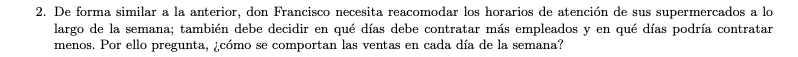

In [129]:
# Agrupamos ventas por tienda y d√≠a de la semana
ventas_por_dia_tienda = df.groupby(['DiaNombre', 'Tienda'])['Ventas'].sum().unstack()

# Ordenamos los d√≠as correctamente
ventas_por_dia_tienda = ventas_por_dia_tienda.reindex(['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo'])

# Agregamos la columna 'Total' sumando Santa Ana + La Floresta
ventas_por_dia_tienda['Total'] = ventas_por_dia_tienda.sum(axis=1)

# Mostramos la tabla final
print(ventas_por_dia_tienda)

Tienda     La Floresta  Santa Ana      Total
DiaNombre                                   
Lunes       1055371.95 1016699.45 2072071.41
Martes      1194650.76 1123419.36 2318070.12
Mi√©rcoles   1245788.47 1184512.79 2430301.26
Jueves      1277271.96 1193247.66 2470519.62
Viernes     1205588.98 1128702.98 2334291.96
S√°bado      1068010.34 1051578.81 2119589.15
Domingo      979867.53  940476.59 1920344.12


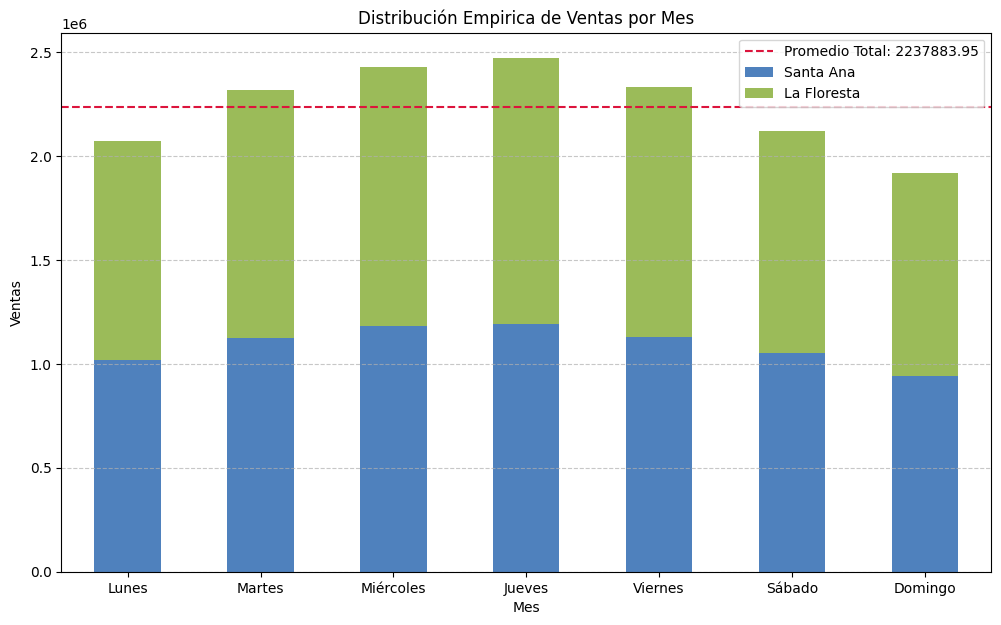

In [130]:
# Gr√°fico de comparaci√≥n
ventas_por_dia_tienda[['Santa Ana', 'La Floresta']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color=colores
)

# Agregamos la l√≠nea de promedio
promedio_total = ventas_por_dia_tienda['Total'].mean()
plt.axhline(y=promedio_total, color='crimson', linestyle='--', label=f'Promedio Total: {promedio_total:.2f}')

# Mejoramos el gr√°fico
plt.title("Distribuci√≥n Empirica de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos
plt.show()

Del an√°lisis surge que el **mi√©rcoles** y el **jueves** son los d√≠as de **mayor volumen de ventas**, con valores superiores al promedio semanal de aproximadamente **2.237.884 d√≥lares**. Estos d√≠as presentan una demanda m√°s alta, por lo que se recomienda reforzar el personal para asegurar un buen nivel de atenci√≥n al cliente.

En contraste, el **domingo** resulta ser el d√≠a de **menor volumen de ventas**, seguido por el **lunes** y el **s√°bado**. Estos d√≠as presentan valores de venta considerablemente m√°s bajos en comparaci√≥n con el resto de la semana. Por lo tanto, Don Francisco podr√≠a considerar reducir el personal durante domingos y lunes para optimizar los costos operativos.

En general, se observa que la actividad comercial se intensifica hacia mediados de semana, con un descenso hacia el fin de semana, lo que sugiere que la planificaci√≥n de horarios y la asignaci√≥n de recursos humanos debe estar alineada con este patr√≥n de comportamiento.

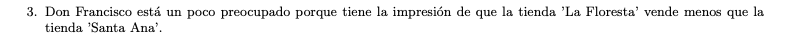

In [131]:
# Agrupamos ventas totales por Tienda
ventas_por_tienda = df.groupby('Tienda')['Ventas'].sum()

# Ventas de cada tienda
ventas_santa_ana = ventas_por_tienda['Santa Ana']
ventas_la_floresta = ventas_por_tienda['La Floresta']

# Calculamos la diferencia absoluta y relativa
diferencia = ventas_la_floresta - ventas_santa_ana
porcentaje_diferencia = (diferencia / ventas_santa_ana) * 100

print(f"Ventas Santa Ana: {ventas_santa_ana:.2f}")
print(f"Ventas La Floresta: {ventas_la_floresta:.2f}")
print(f"Diferencia absoluta: {diferencia:.2f}")
print(f"Diferencia relativa: {porcentaje_diferencia:.2f}% respecto a Santa Ana")

Ventas Santa Ana: 7638637.64
Ventas La Floresta: 8026550.00
Diferencia absoluta: 387912.36
Diferencia relativa: 5.08% respecto a Santa Ana


La impresi√≥n de Don Francisco no se confirma. Lejos de vender menos, la tienda "La Floresta" ha logrado superar las ventas de "Santa Ana" en aproximadamente un 5%. Si bien la diferencia no es extremadamente significativa, muestra que "La Floresta" se mantiene competitiva e incluso supera ligeramente a "Santa Ana" en desempe√±o comercial.

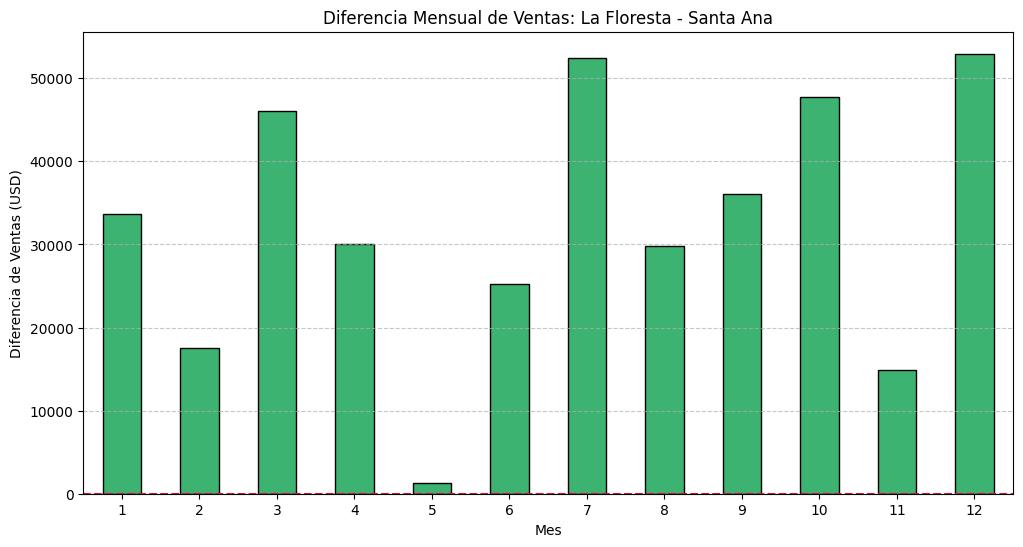

In [132]:
# Calculamos la diferencia: La Floresta - Santa Ana
diferencia_mensual = tabla_ventas['La Floresta'] - tabla_ventas['Santa Ana']

# Graficamos
plt.figure(figsize=(12,6))
diferencia_mensual.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.axhline(0, color='crimson', linestyle='--')
plt.title("Diferencia Mensual de Ventas: La Floresta - Santa Ana")
plt.xlabel("Mes")
plt.ylabel("Diferencia de Ventas (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

- **En todos los meses del a√±o**, las diferencias son **positivas**, lo que significa que **La Floresta vendi√≥ m√°s que Santa Ana** a lo largo de todo el per√≠odo.
- La diferencia de ventas var√≠a de mes a mes, con algunos meses mostrando una diferencia superior a **50.000 d√≥lares**.
- En el mes de **mayo**, la diferencia es m√≠nima pero a√∫n favorable a La Floresta.

La percepci√≥n de Don Francisco resulta incorrecta no solo a nivel anual, sino tambi√©n al observar el comportamiento mes a mes: **La Floresta ha mantenido una ventaja constante sobre Santa Ana durante todo el a√±o**. Esta consistencia en el desempe√±o comercial refuerza la solidez de "La Floresta" como tienda y sugiere que las estrategias actuales est√°n siendo efectivas.

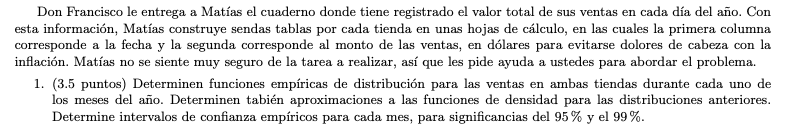

In [133]:
df_santa_ana['Fecha'] = pd.to_datetime(df_santa_ana['Fecha'])
df_la_floresta['Fecha'] = pd.to_datetime(df_la_floresta['Fecha'])

df_santa_ana['Mes'] = df_santa_ana['Fecha'].dt.month
df_la_floresta['Mes'] = df_la_floresta['Fecha'].dt.month

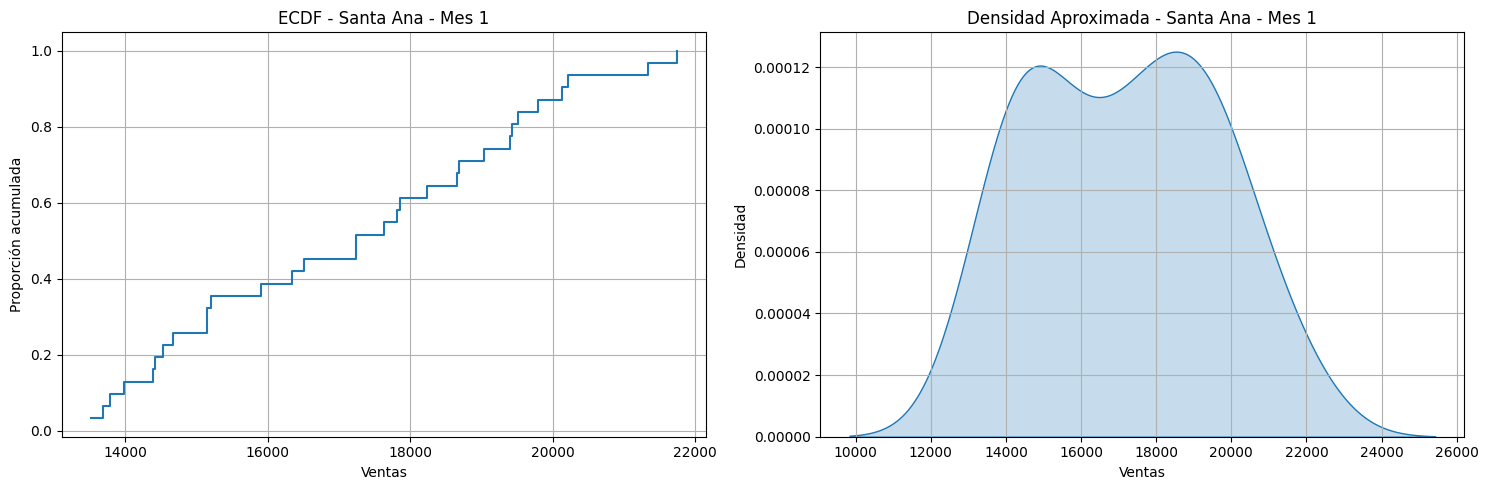

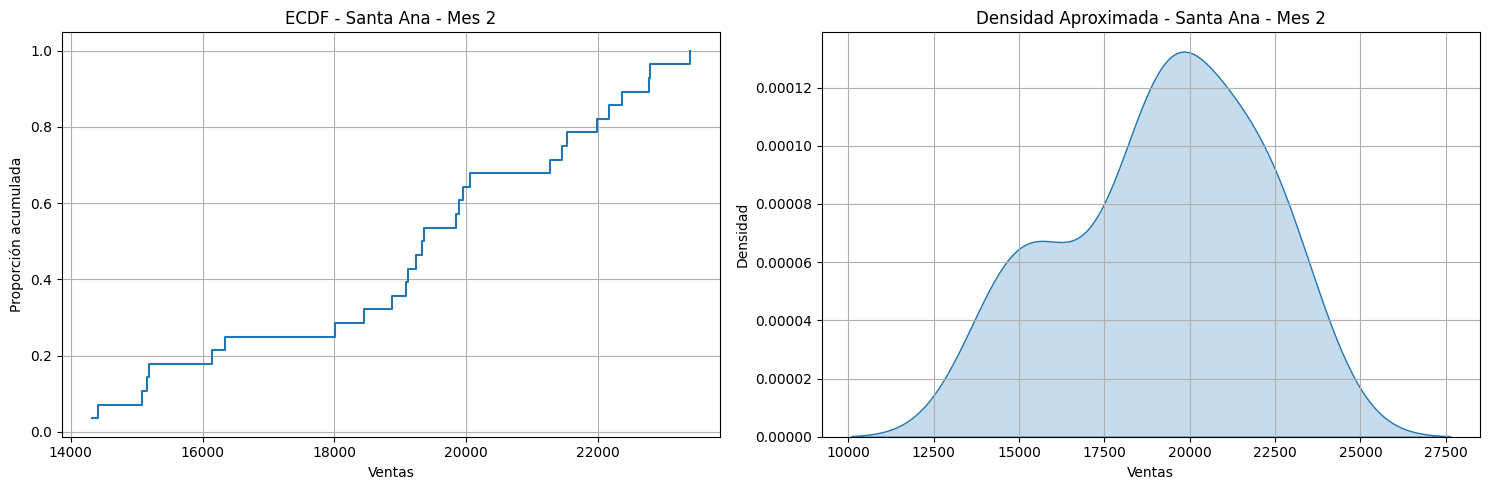

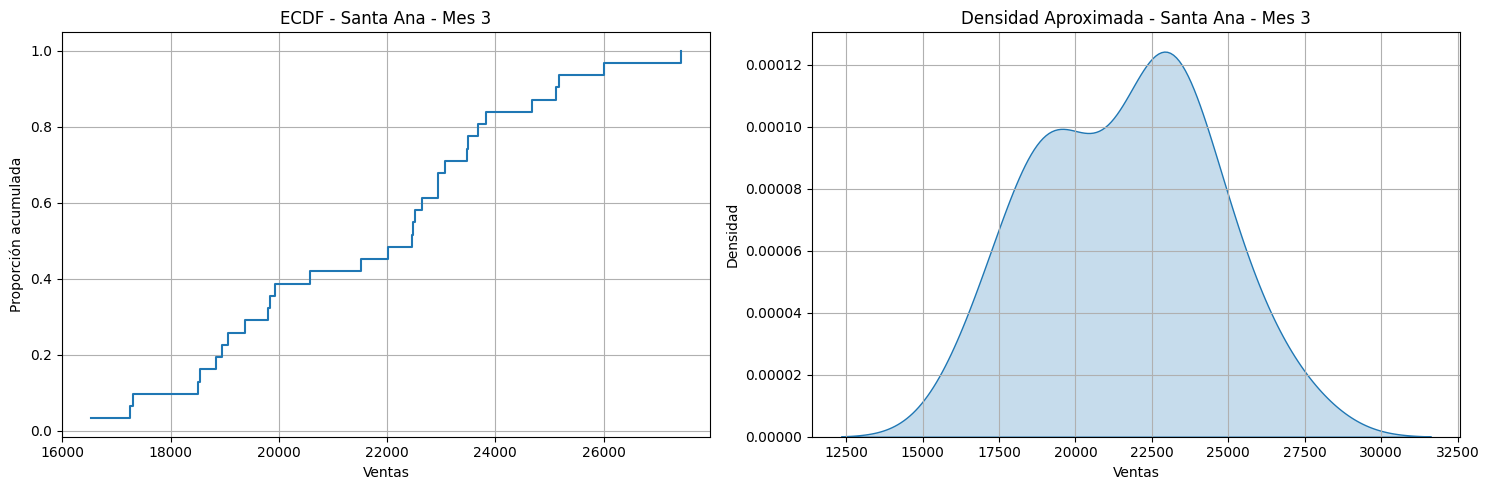

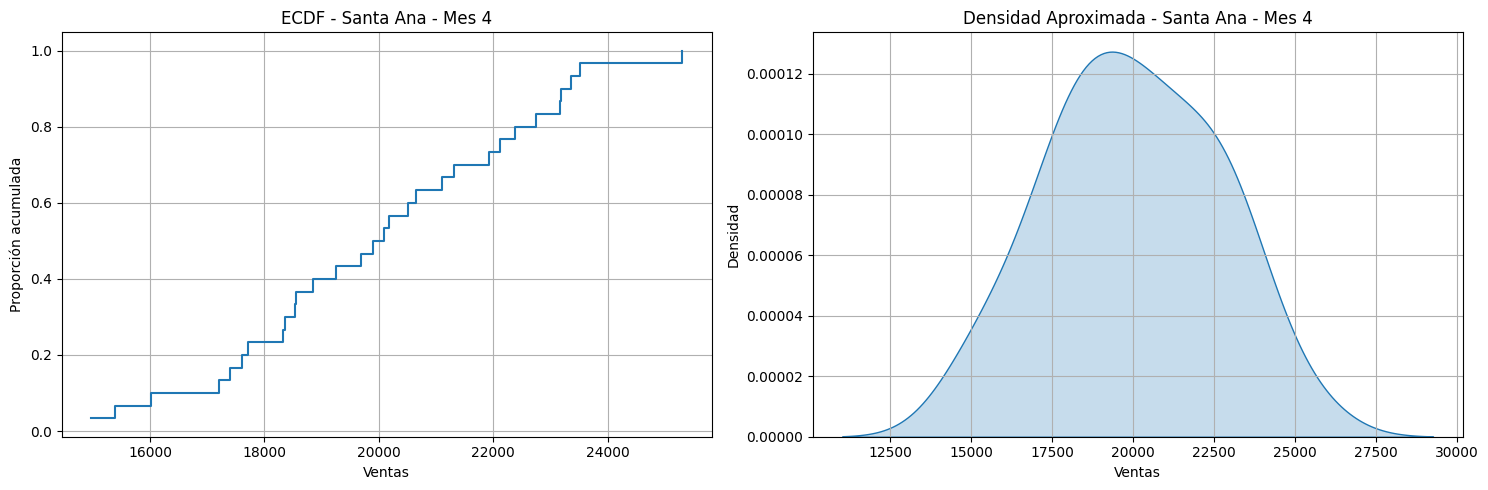

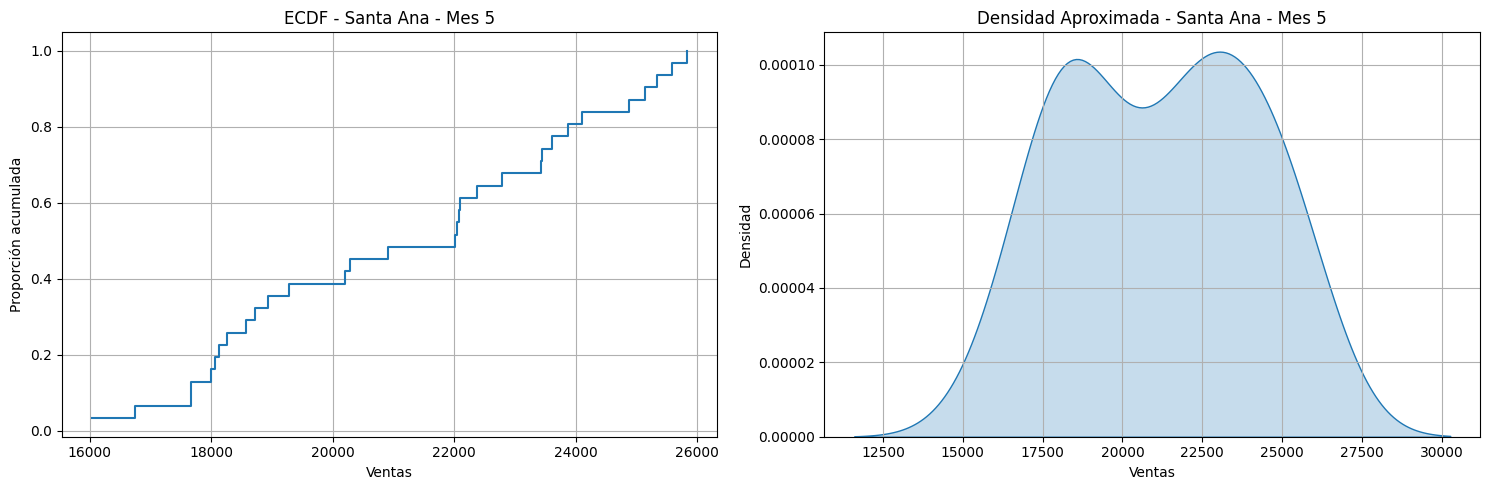

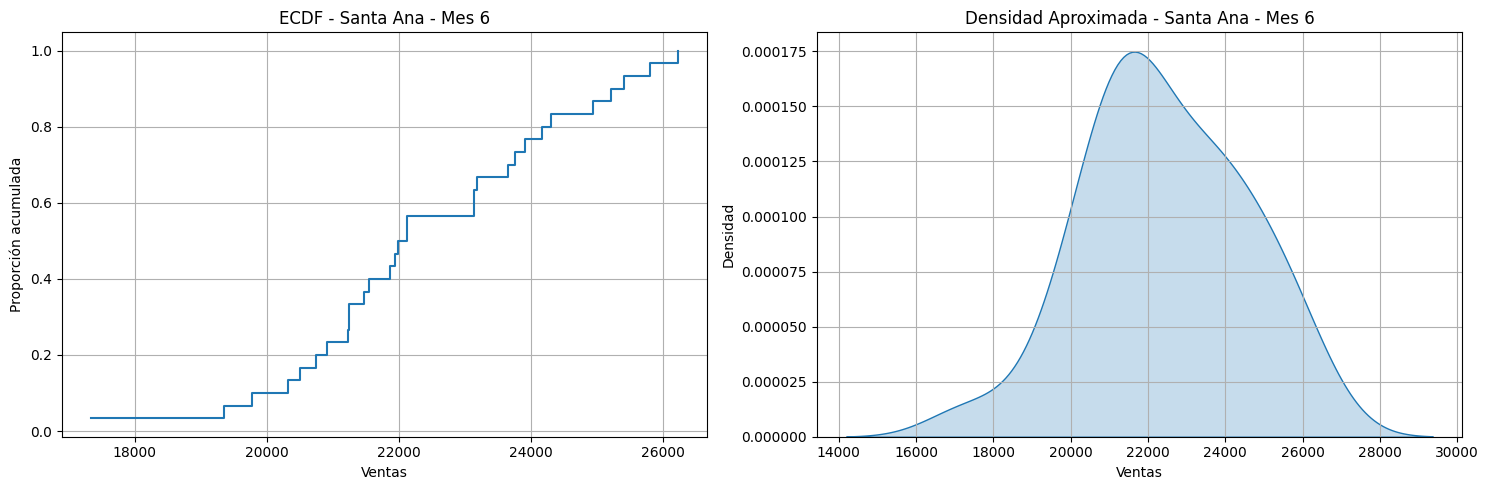

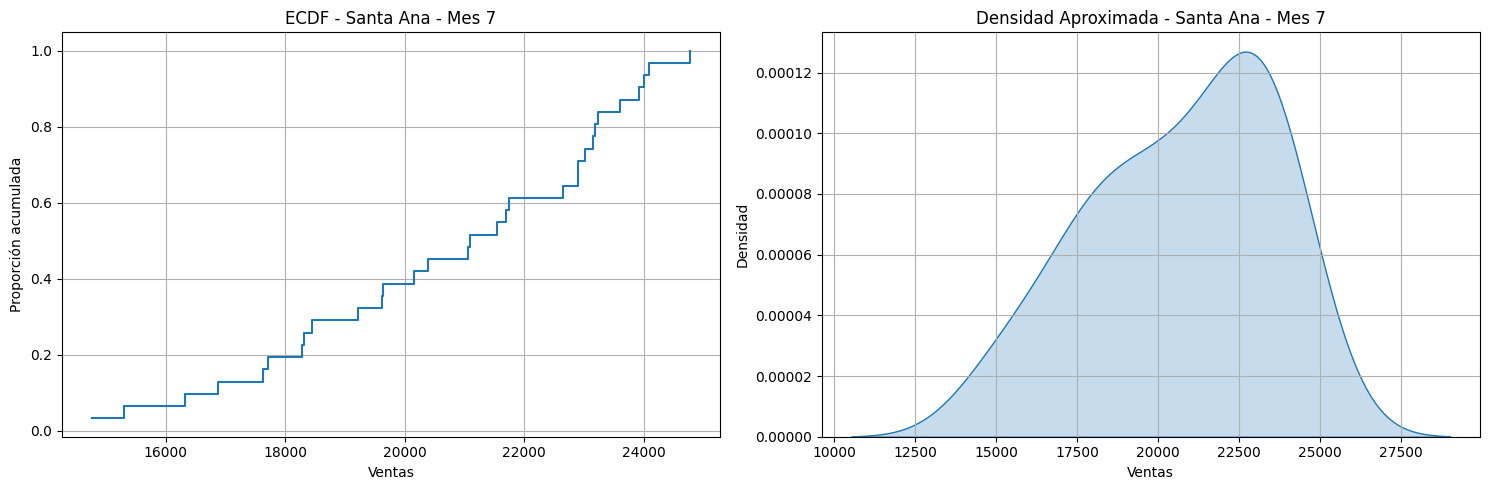

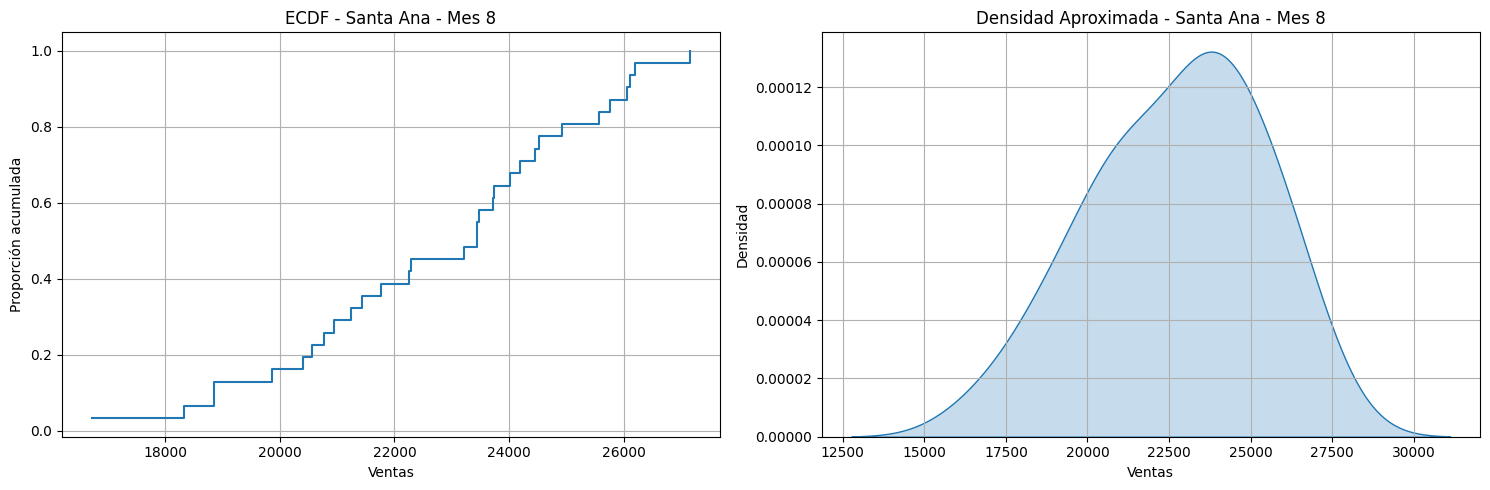

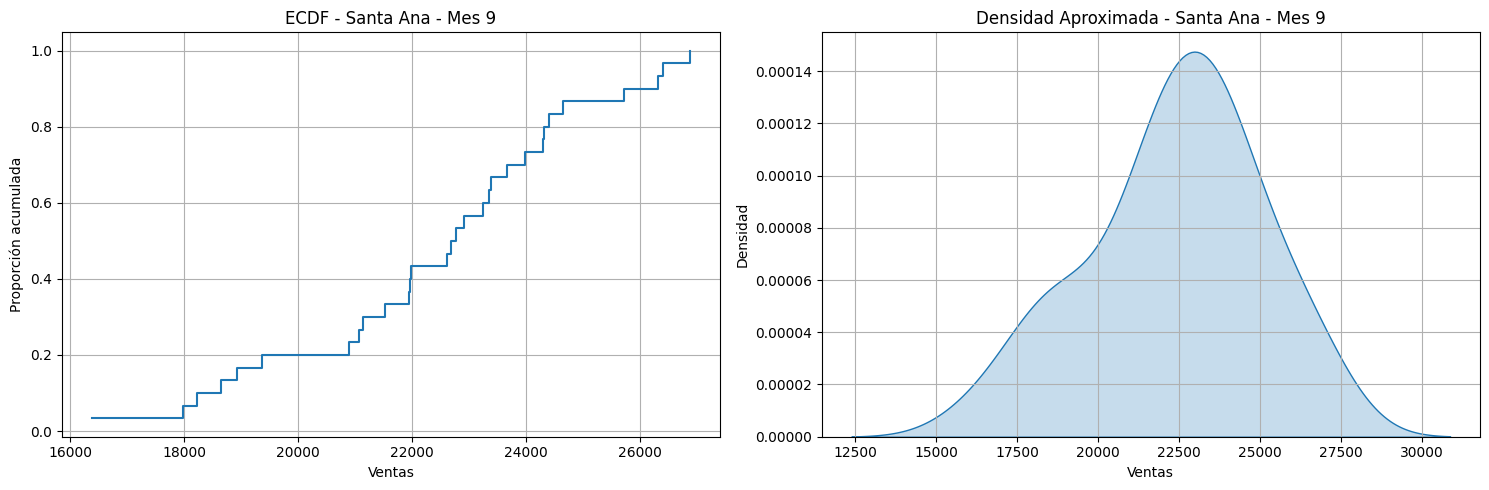

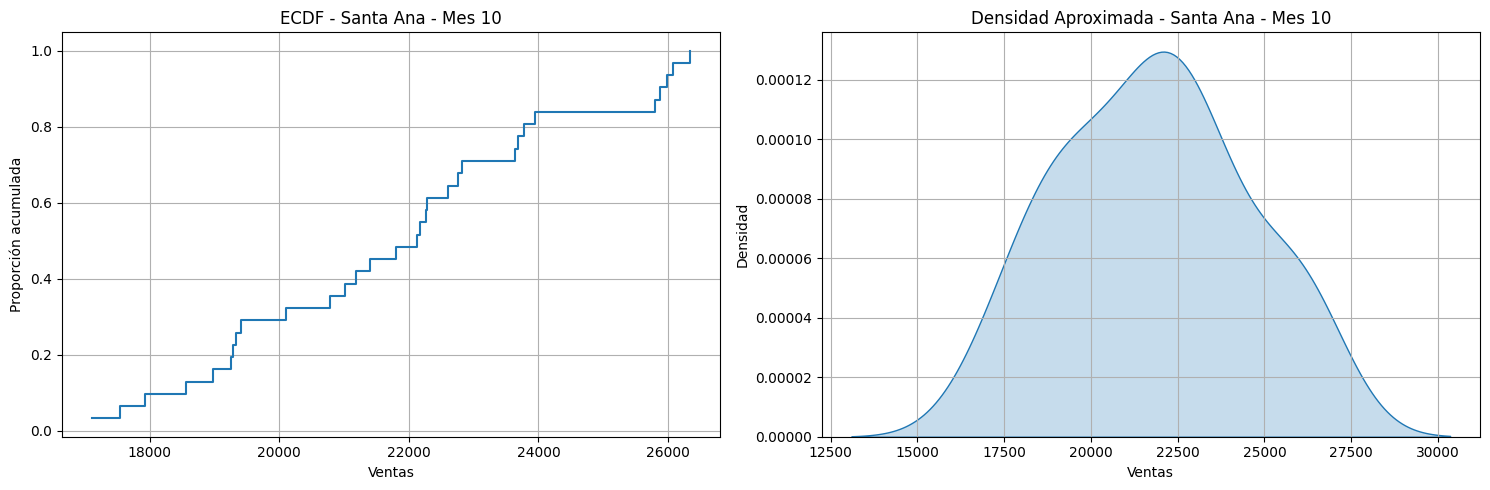

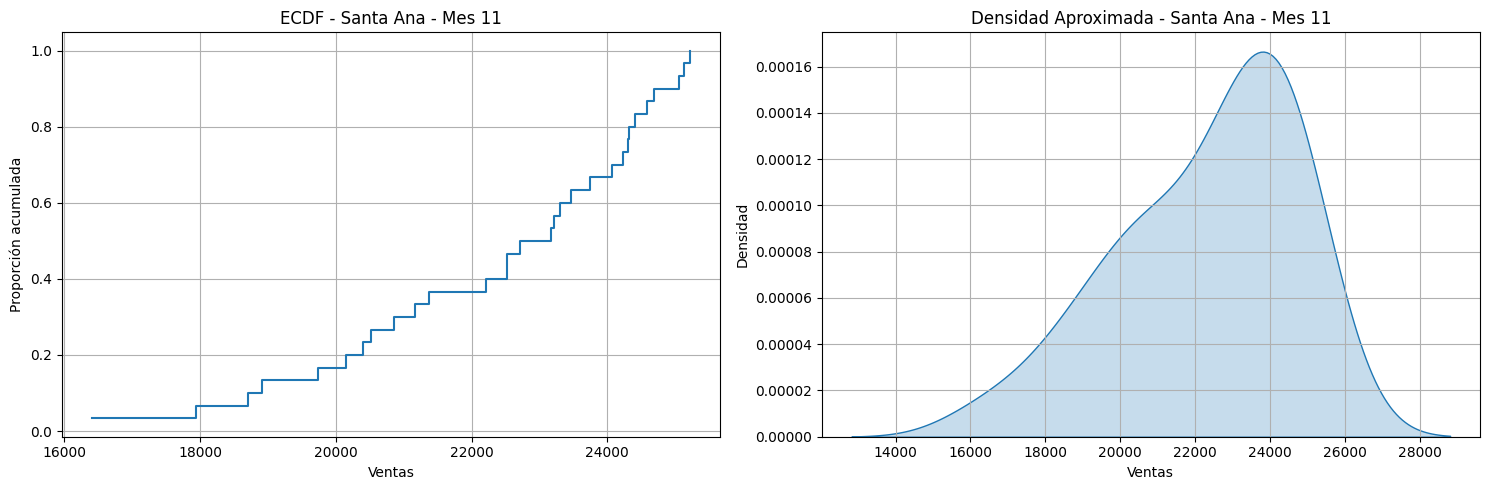

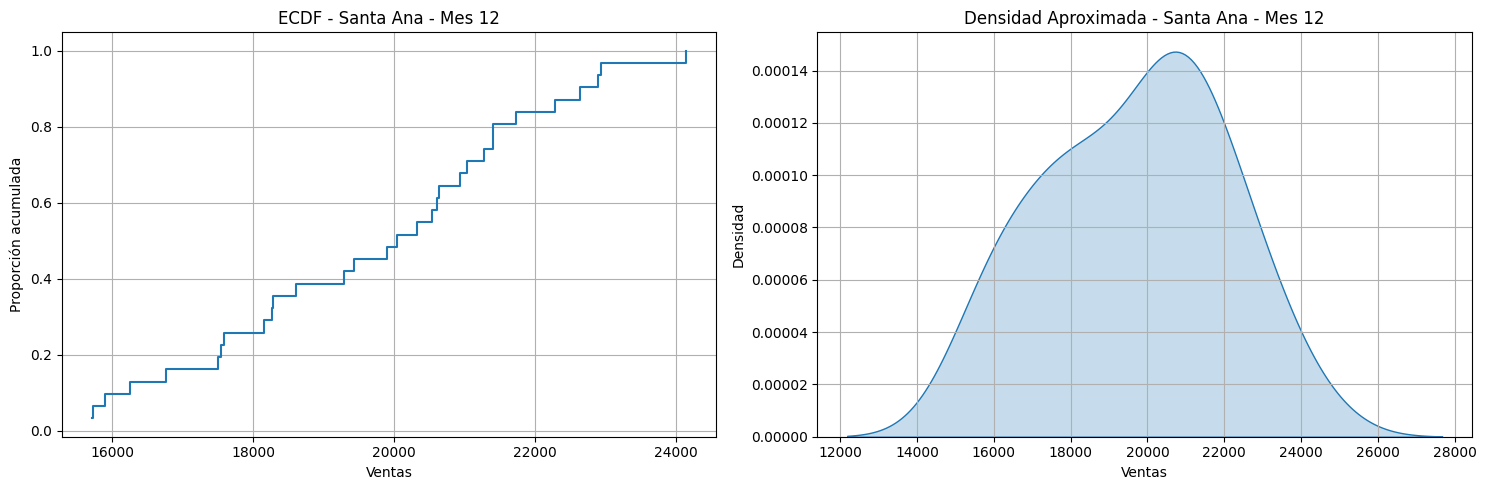

In [134]:
meses_santa = sorted(df_santa_ana['Mes'].unique())

for mes in meses_santa:
    datos = df_santa_ana[df_santa_ana['Mes'] == mes]['Ventas']
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)
    
    # ECDF
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.step(x, y, where='post')
    plt.title(f'ECDF - Santa Ana - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Proporci√≥n acumulada')
    plt.grid(True)
    
    # Aproximacion de Densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(datos, fill=True)
    plt.title(f'Densidad Aproximada - Santa Ana - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Densidad')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [135]:
# Funci√≥n para calcular ICE por percentiles interpolados
def calcular_ice_por_mes(df, tienda, niveles=[0.95, 0.99]):
    df_tienda = df[df['Tienda'] == tienda]
    meses = sorted(df_tienda['Mes'].unique())
    filas = []

    for mes in meses:
        datos = df_tienda[df_tienda['Mes'] == mes]['Ventas'].values
        fila = {'Mes': mes}
        for nivel in niveles:
            alpha = 1 - nivel
            low = np.percentile(datos, alpha/2 * 100)
            high = np.percentile(datos, (1 - alpha/2) * 100)
            fila[f'ICE {int(nivel*100)}% Inferior'] = round(low, 2)
            fila[f'ICE {int(nivel*100)}% Superior'] = round(high, 2)
        filas.append(fila)

    return pd.DataFrame(filas)

In [136]:
ice_santa_ana = calcular_ice_por_mes(df, 'Santa Ana')

ice_santa_ana.head(12)

Mes  ICE 95% Inferior  ICE 95% Superior  ICE 99% Inferior  \
0     1          13653.85          21434.47          13549.19   
1     2          14383.19          22992.73          14330.75   
2     3          17071.89          26362.61          16642.87   
3     4          15279.72          24010.04          15035.83   
4     5          16563.84          25641.64          16138.03   
5     6          18798.67          25914.80          17632.40   
6     7          15168.10          24260.96          14845.11   
7     8          17934.11          26440.91          16963.87   
8     9          17540.83          26536.10          16613.04   
9    10          17434.17          26147.36          17173.08   
10   11          17520.90          25157.23          16628.33   
11   12          15726.79          23240.76          15710.62   

    ICE 99% Superior  
0           21678.99  
1           23322.30  
2           27214.67  
3           25040.75  
4           25797.73  
5           26154.52  
6           24673.60  
7           27016.54  
8           26810.50  
9           26304.81  
10          25209.48  
11          23970.39

In [137]:
def graficar_ice(df_ice, tienda, t='Mes'):
    # Extraer eje x
    eje_x = df_ice[t]

    # Si son d√≠as de la semana, aseguramos el orden correcto
    if t.lower().startswith('dia'):
        dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        df_ice[t] = pd.Categorical(df_ice[t], categories=dias_orden, ordered=True)
        df_ice = df_ice.sort_values(t)
        eje_x = df_ice[t]

    # Convertimos a array
    ice_95_inf = df_ice['ICE 95% Inferior'].astype(float).values
    ice_95_sup = df_ice['ICE 95% Superior'].astype(float).values
    ice_99_inf = df_ice['ICE 99% Inferior'].astype(float).values
    ice_99_sup = df_ice['ICE 99% Superior'].astype(float).values

    # Crear figura
    plt.figure(figsize=(12, 6))

    # L√≠neas
    plt.plot(eje_x, ice_95_inf, label='ICE 95% Inferior', linestyle='--', marker='o', color='blue')
    plt.plot(eje_x, ice_95_sup, label='ICE 95% Superior', linestyle='--', marker='o', color='blue')
    plt.plot(eje_x, ice_99_inf, label='ICE 99% Inferior', linestyle='--', marker='s', color='red')
    plt.plot(eje_x, ice_99_sup, label='ICE 99% Superior', linestyle='--', marker='s', color='red')

    # Rellenos
    plt.fill_between(eje_x, ice_95_inf, ice_95_sup, alpha=0.2, color='blue')
    plt.fill_between(eje_x, ice_99_inf, ice_99_sup, alpha=0.1, color='red')

    # Est√©tica
    plt.title(f'Intervalos de Confianza Emp√≠ricos por {t} - {tienda}')
    plt.xlabel(t)
    plt.ylabel('Ventas (USD)')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

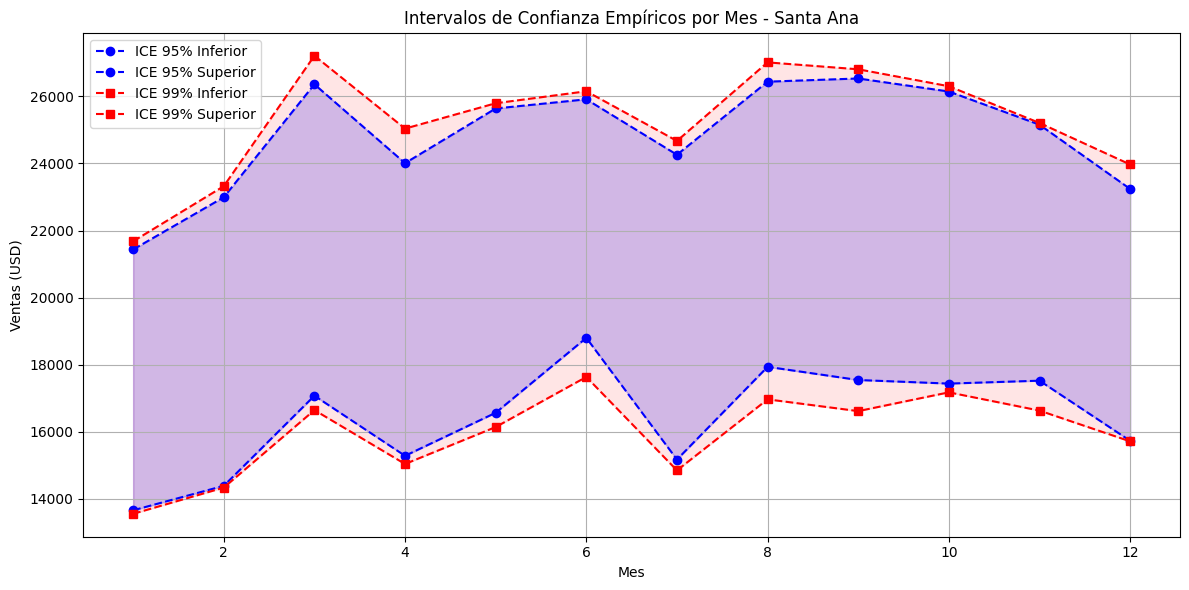

In [138]:
graficar_ice(ice_santa_ana, 'Santa Ana')

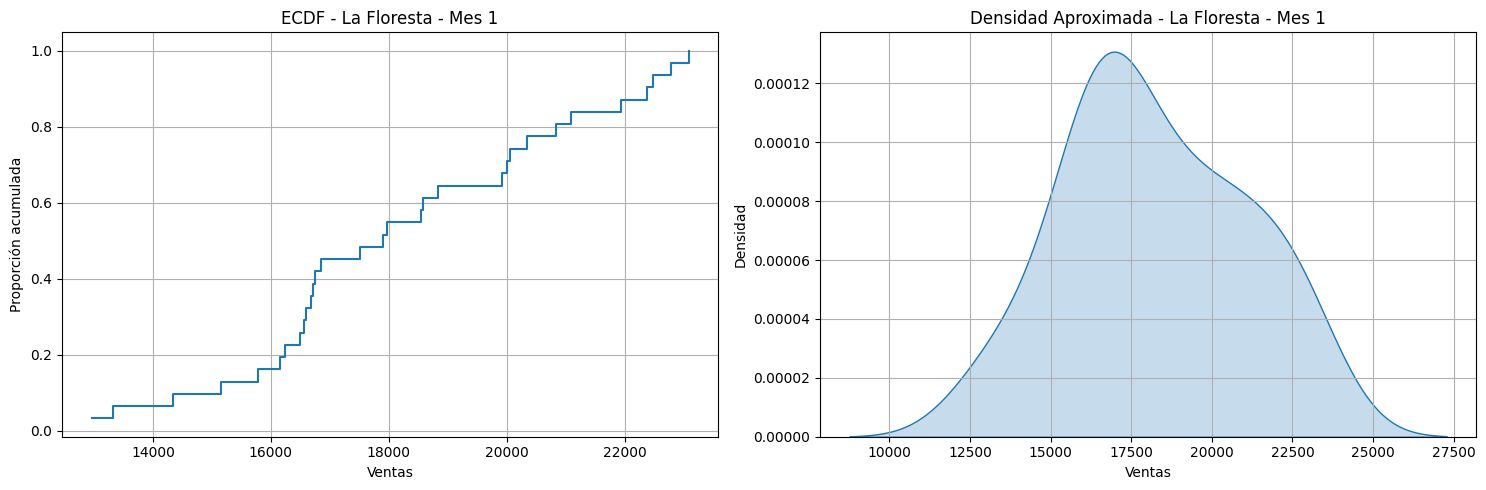

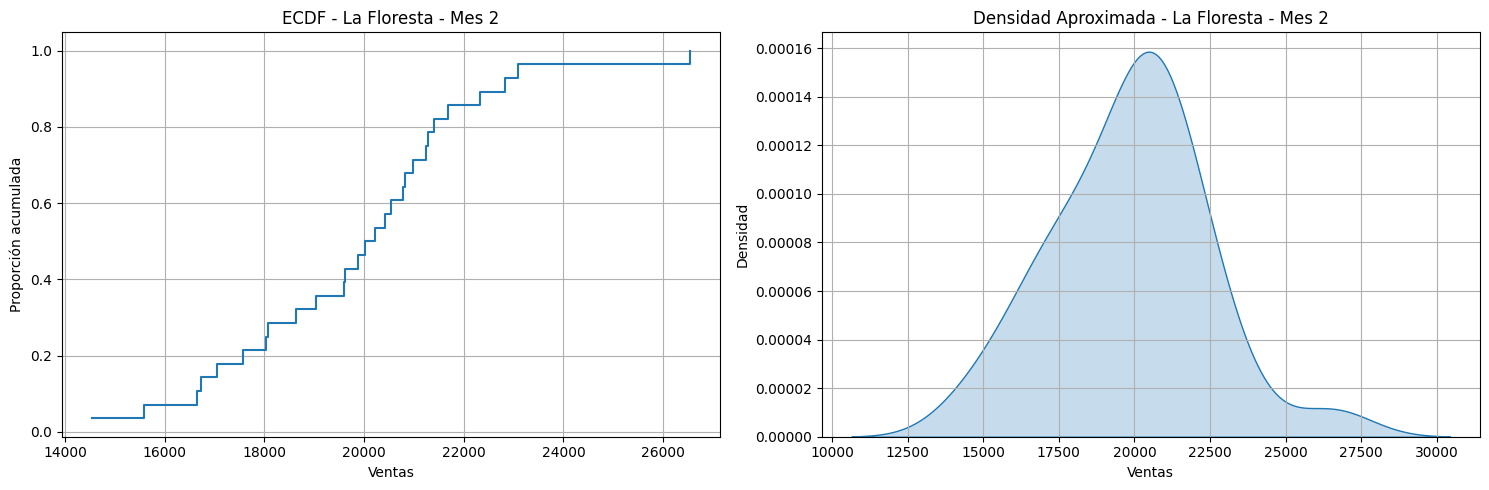

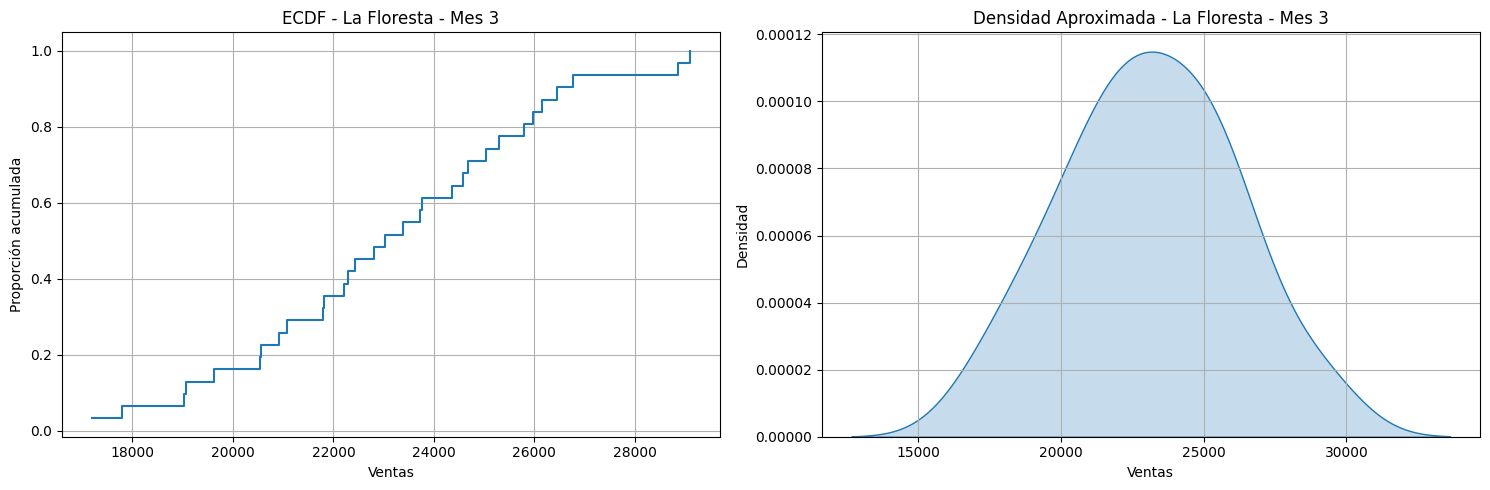

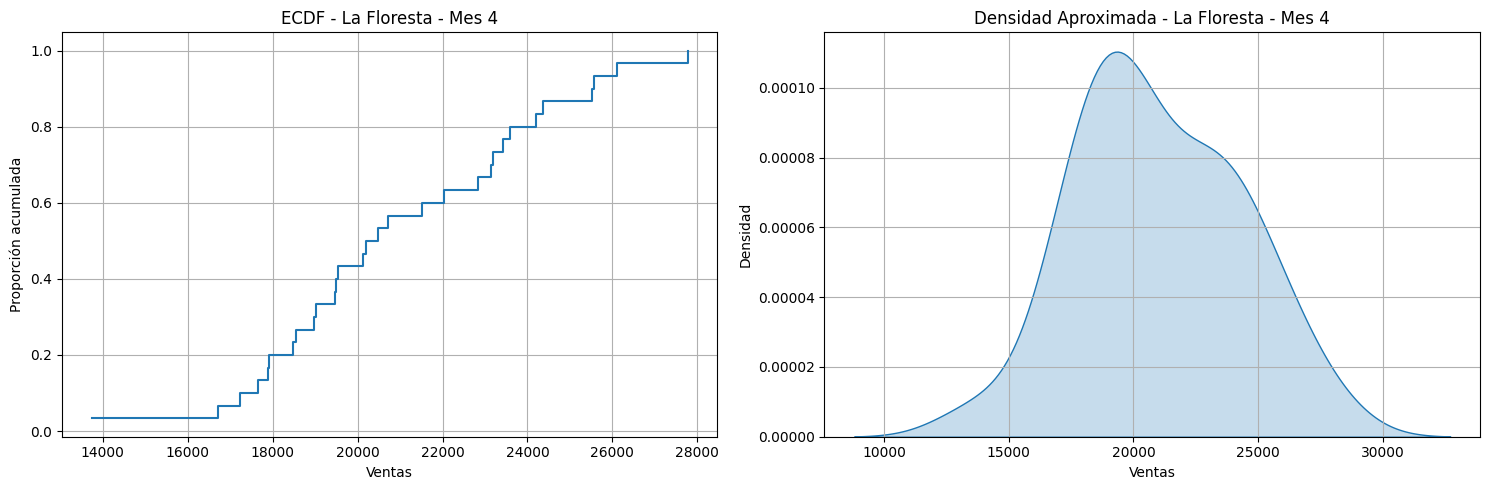

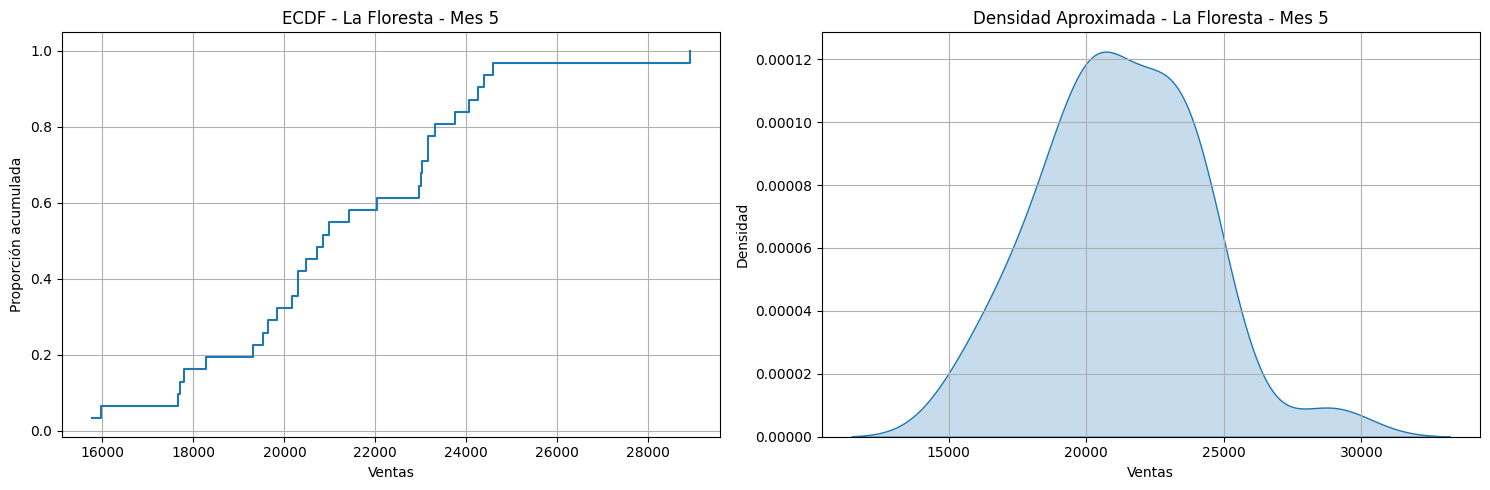

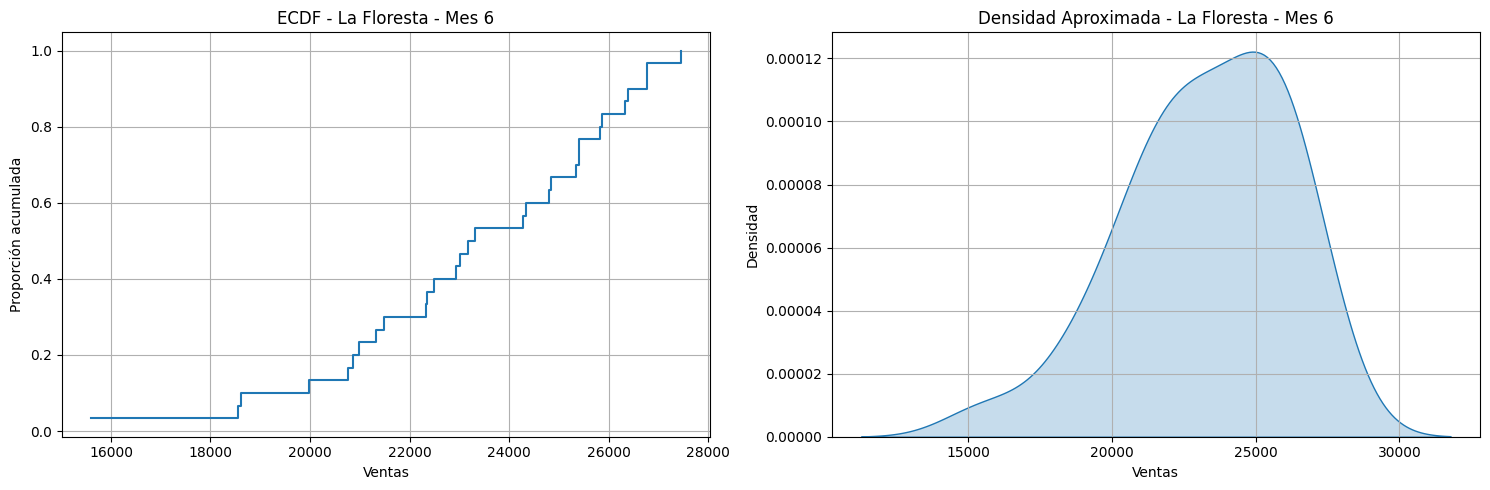

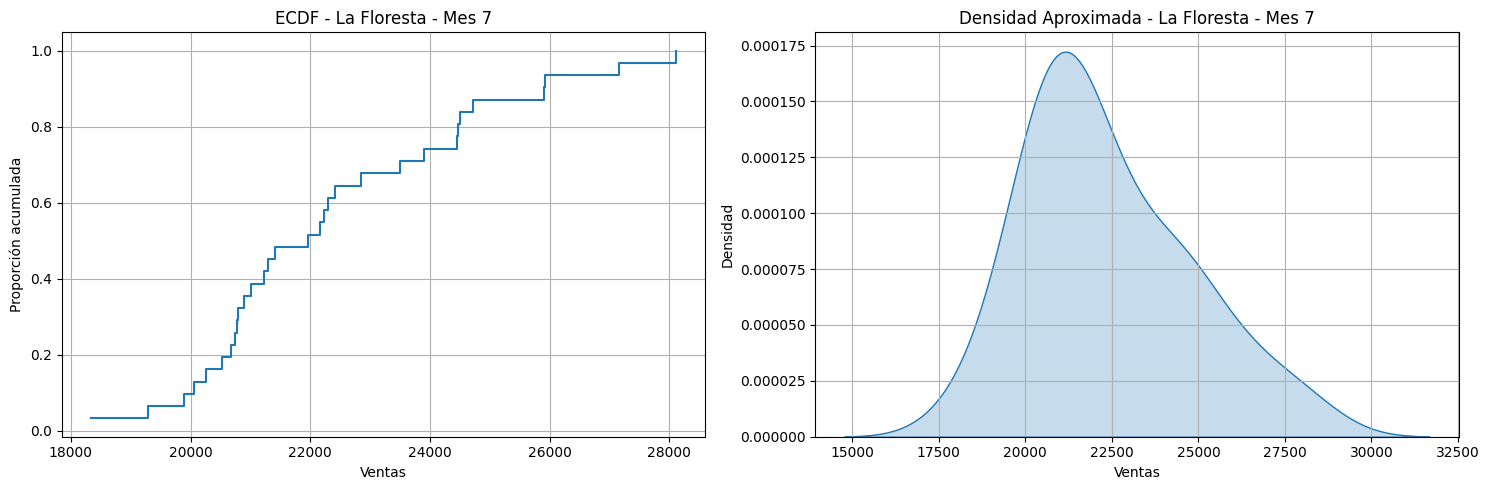

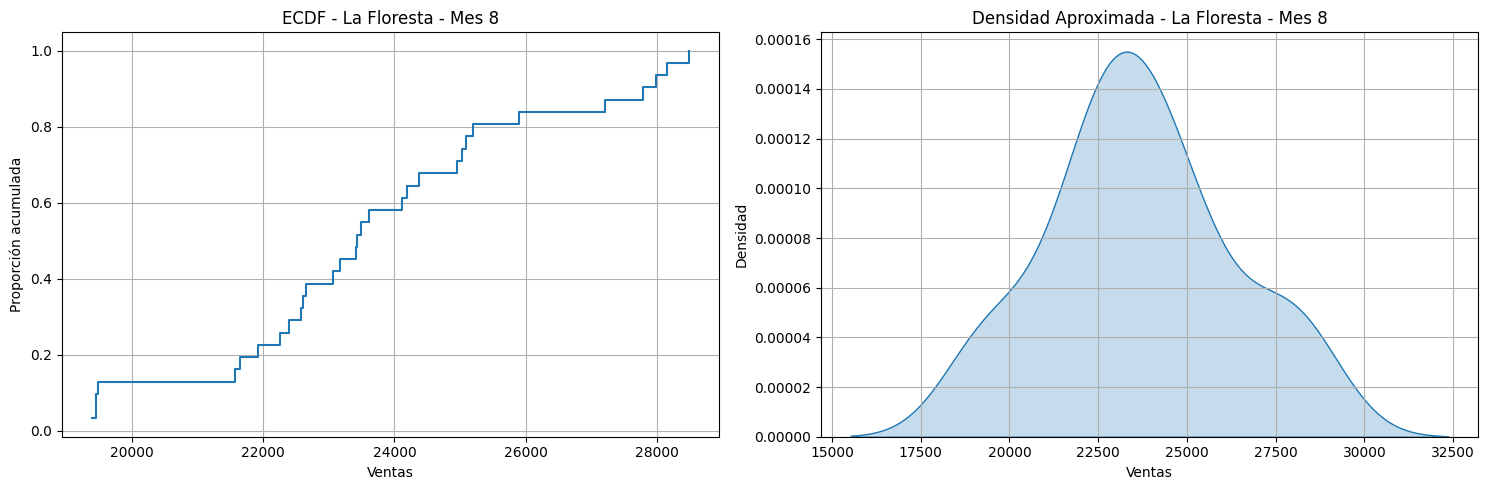

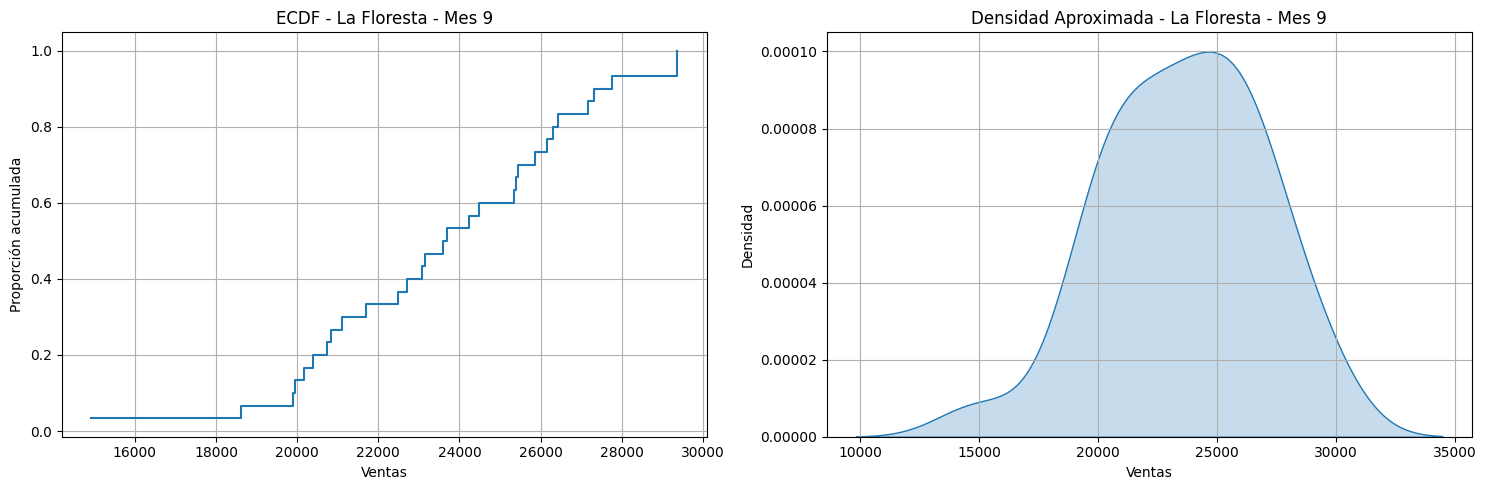

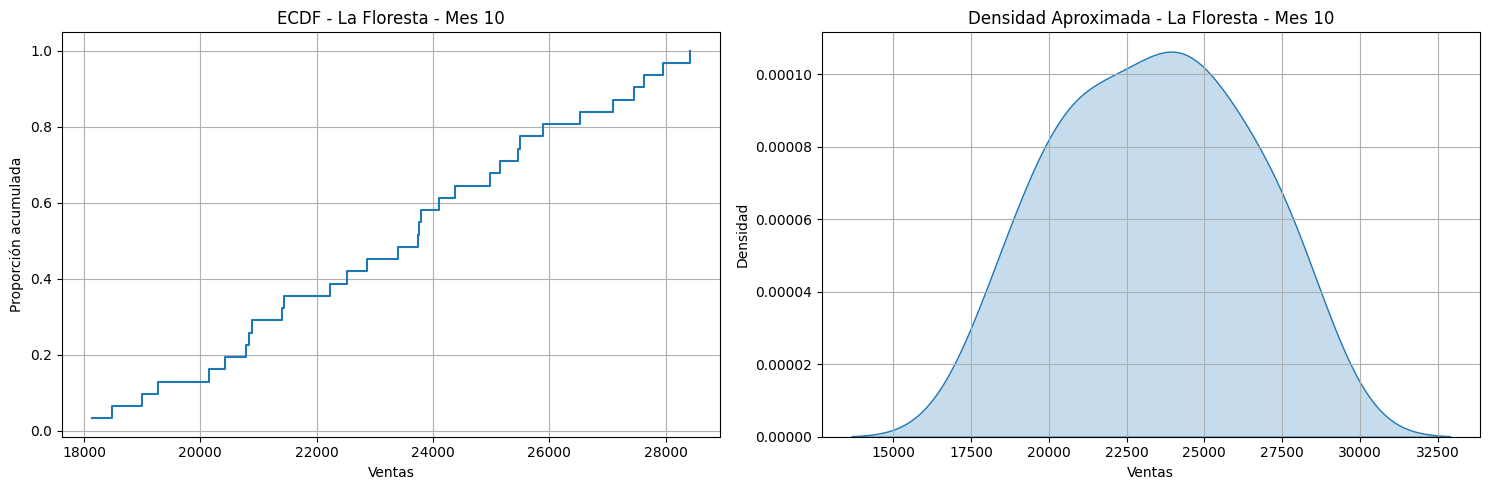

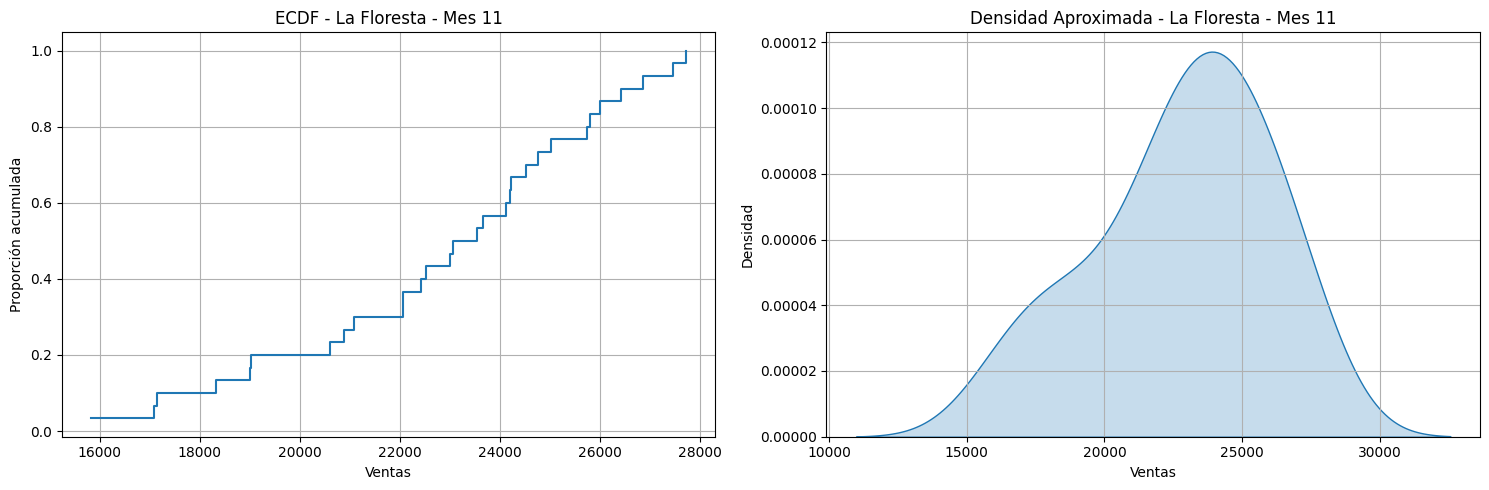

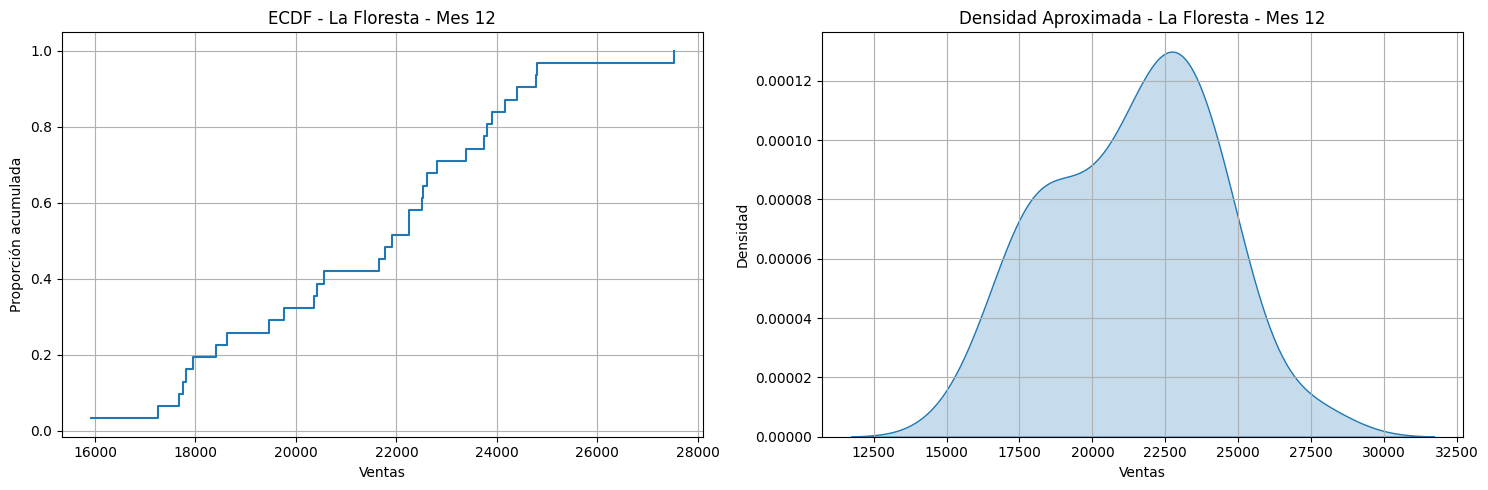

In [139]:
meses_floresta = sorted(df_la_floresta['Mes'].unique())

for mes in meses_floresta:
    datos = df_la_floresta[df_la_floresta['Mes'] == mes]['Ventas']
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)
    
    # ECDF
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.step(x, y, where='post')
    plt.title(f'ECDF - La Floresta - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Proporci√≥n acumulada')
    plt.grid(True)
    
    # Aproximaci√≥n de Densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(datos, fill=True)
    plt.title(f'Densidad Aproximada - La Floresta - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Densidad')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [140]:
ice_la_floresta = calcular_ice_por_mes(df, 'La Floresta')

ice_la_floresta.head(12)

Mes  ICE 95% Inferior  ICE 95% Superior  ICE 99% Inferior  \
0     1          13227.60          22859.55          13013.73   
1     2          15239.71          24207.15          14678.13   
2     3          17635.21          28916.44          17277.77   
3     4          15886.88          26571.25          14164.86   
4     5          15915.23          25672.00          15794.70   
5     6          17745.28          26957.79          16031.92   
6     7          19054.81          27398.49          18480.73   
7     8          19433.27          28240.12          19392.64   
8     9          17596.44          29358.67          15457.50   
9    10          18396.02          28070.31          18185.58   
10   11          16738.70          27522.61          16017.95   
11   12          16923.32          25472.89          16119.94   

    ICE 99% Superior  
0           23040.98  
1           26077.53  
2           29066.92  
3           27529.24  
4           28272.90  
5           27351.65  
6           27970.26  
7           28447.22  
8           29366.90  
9           28353.35  
10          27669.85  
11          27112.62

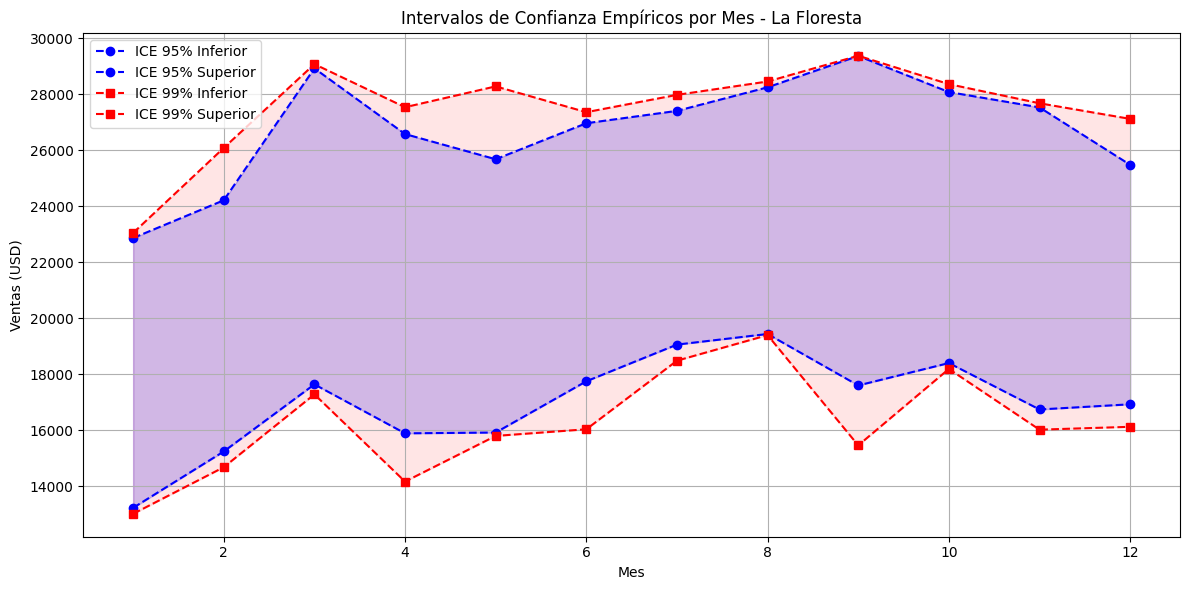

In [141]:
graficar_ice(ice_la_floresta, 'La Floresta')

Ambas tiendas muestran comportamientos estacionales similares en t√©rminos generales, pero con diferencias importantes en la distribuci√≥n y variabilidad de sus ventas:

**Distribuci√≥n de Ventas (KDE y ECDF)**
- La Floresta tiende a tener KDE con mayor concentraci√≥n y picos m√°s definidos en varios meses, lo que sugiere mayor estabilidad en los niveles de ventas diarios.
- Santa Ana, en cambio, presenta distribuciones m√°s anchas en algunos meses (marzo, agosto), indicando mayor dispersi√≥n de los montos diarios y, por tanto, una mayor incertidumbre operativa en ciertos per√≠odos.
- La funci√≥n ECDF de La Floresta en muchos meses crece m√°s r√°pido, lo que tambi√©n refuerza la percepci√≥n de ventas m√°s consistentes.

**Niveles de Venta e Intervalos de Confianza (ICE)**
- A nivel mensual, los ICE de La Floresta tienden a ubicarse en un rango ligeramente m√°s alto que los de Santa Ana, reflejando ventas medianamente superiores.
- No obstante, Santa Ana presenta algunos meses con m√°ximos comparables o incluso mayores (como agosto), pero acompa√±ados de una mayor variabilidad (intervalos m√°s amplios).
- En t√©rminos de confiabilidad operativa, La Floresta ofrece rangos m√°s acotados en muchos meses, lo cual puede facilitar la planificaci√≥n.


**Coclusi√≥n General**
- La Floresta muestra un patr√≥n de ventas m√°s estable y menos disperso, lo cual es ventajoso para la previsi√≥n de stock, personal e inversiones.
- Santa Ana tiene m√°s variabilidad intermensual, con meses de alta actividad pero tambi√©n mayor incertidumbre, lo que podr√≠a indicar oportunidades de mejora en gesti√≥n o promoci√≥n.

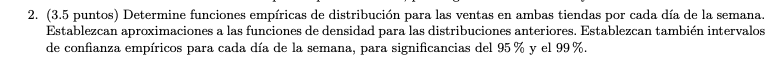

In [142]:
df_santa_ana['DiaSemana'] = df_santa_ana['Fecha'].dt.day_name()
df_la_floresta['DiaSemana'] = df_la_floresta['Fecha'].dt.day_name()

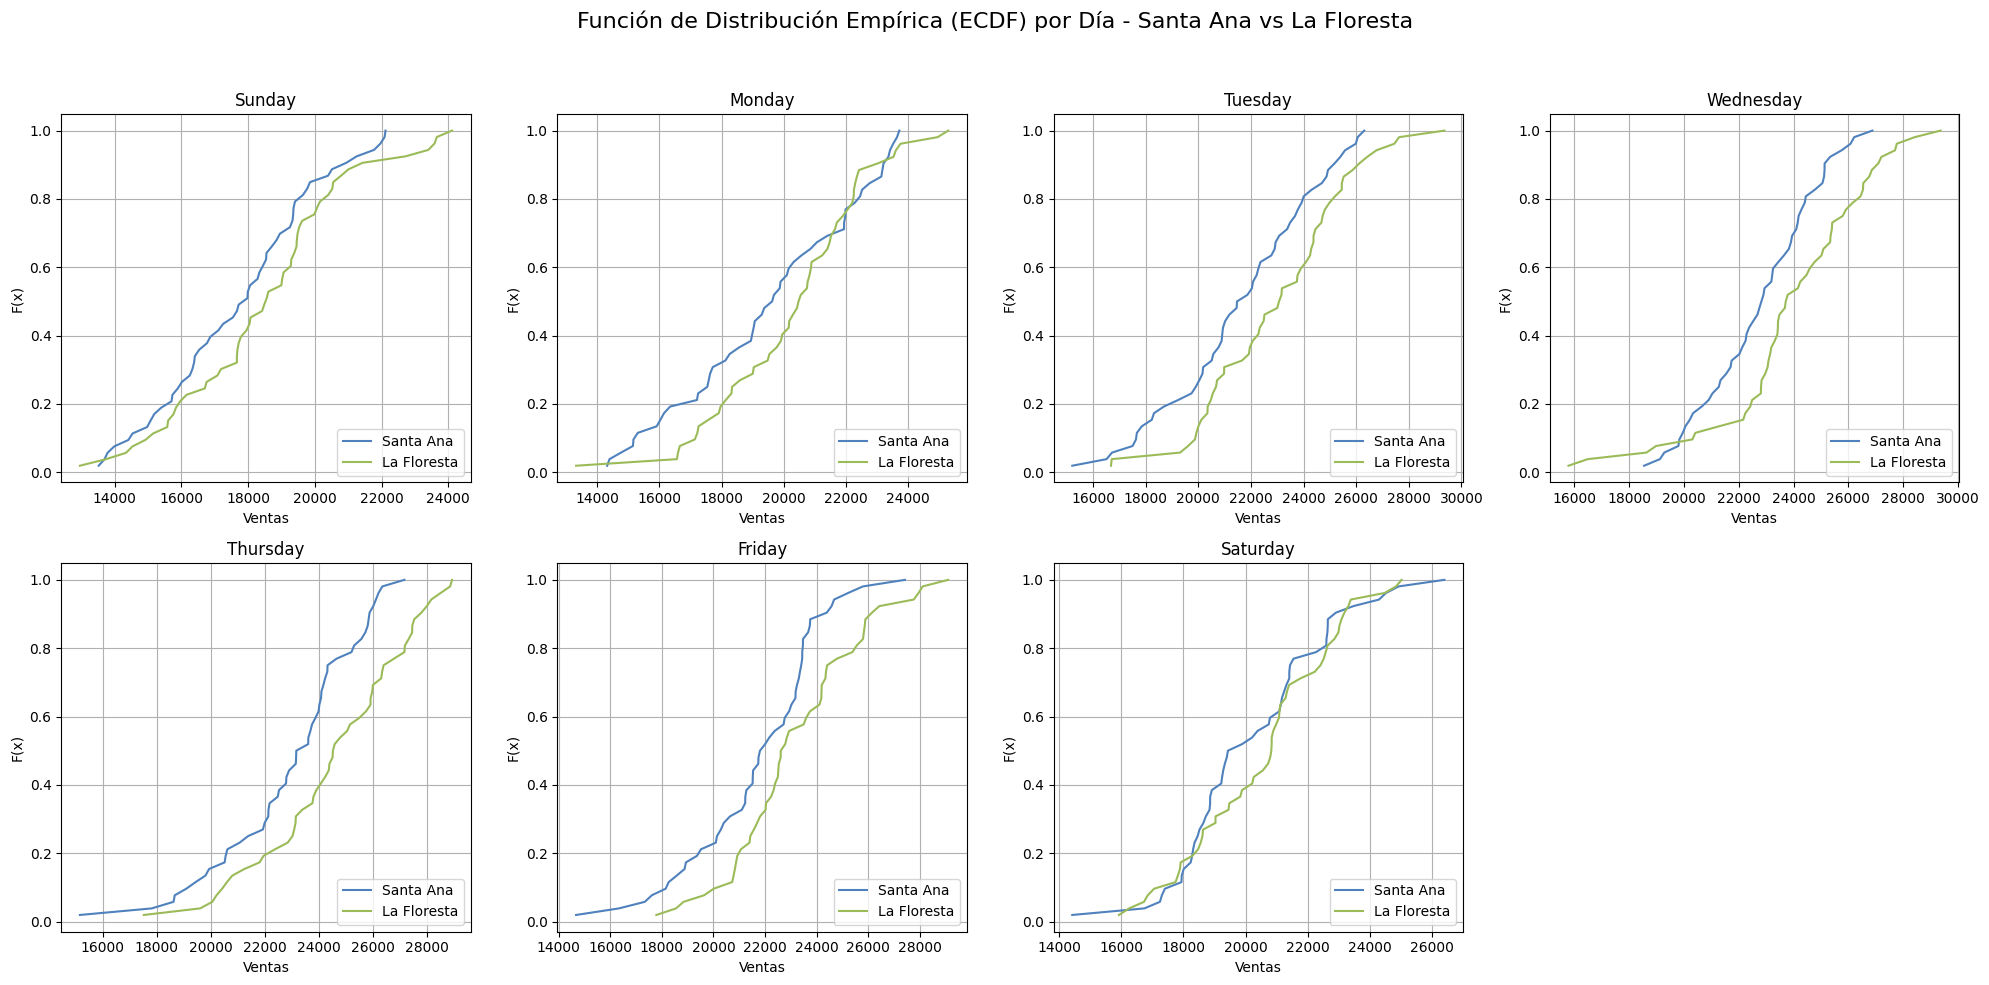

In [143]:
dias = df_santa_ana['DiaSemana'].unique()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Funci√≥n de Distribuci√≥n Emp√≠rica (ECDF) por D√≠a - Santa Ana vs La Floresta", fontsize=16)

for i, dia in enumerate(dias):
    row, col = divmod(i, 4)
    ax = axs[row, col]

    ventas_sa = df_santa_ana[df_santa_ana['DiaSemana'] == dia]['Ventas']
    ventas_lf = df_la_floresta[df_la_floresta['DiaSemana'] == dia]['Ventas']

    ecdf_sa = ECDF(ventas_sa)
    ecdf_lf = ECDF(ventas_lf)

    ax.plot(ecdf_sa.x, ecdf_sa.y, label='Santa Ana', color=colores[0])
    ax.plot(ecdf_lf.x, ecdf_lf.y, label='La Floresta', color=colores[1])
    ax.set_title(dia)
    ax.set_xlabel("Ventas")
    ax.set_ylabel("F(x)")
    ax.legend(loc='lower right')
    ax.grid(True)

# Eliminar subplot vac√≠o si hay menos de 8
if len(dias) < 8:
    axs[1, 3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


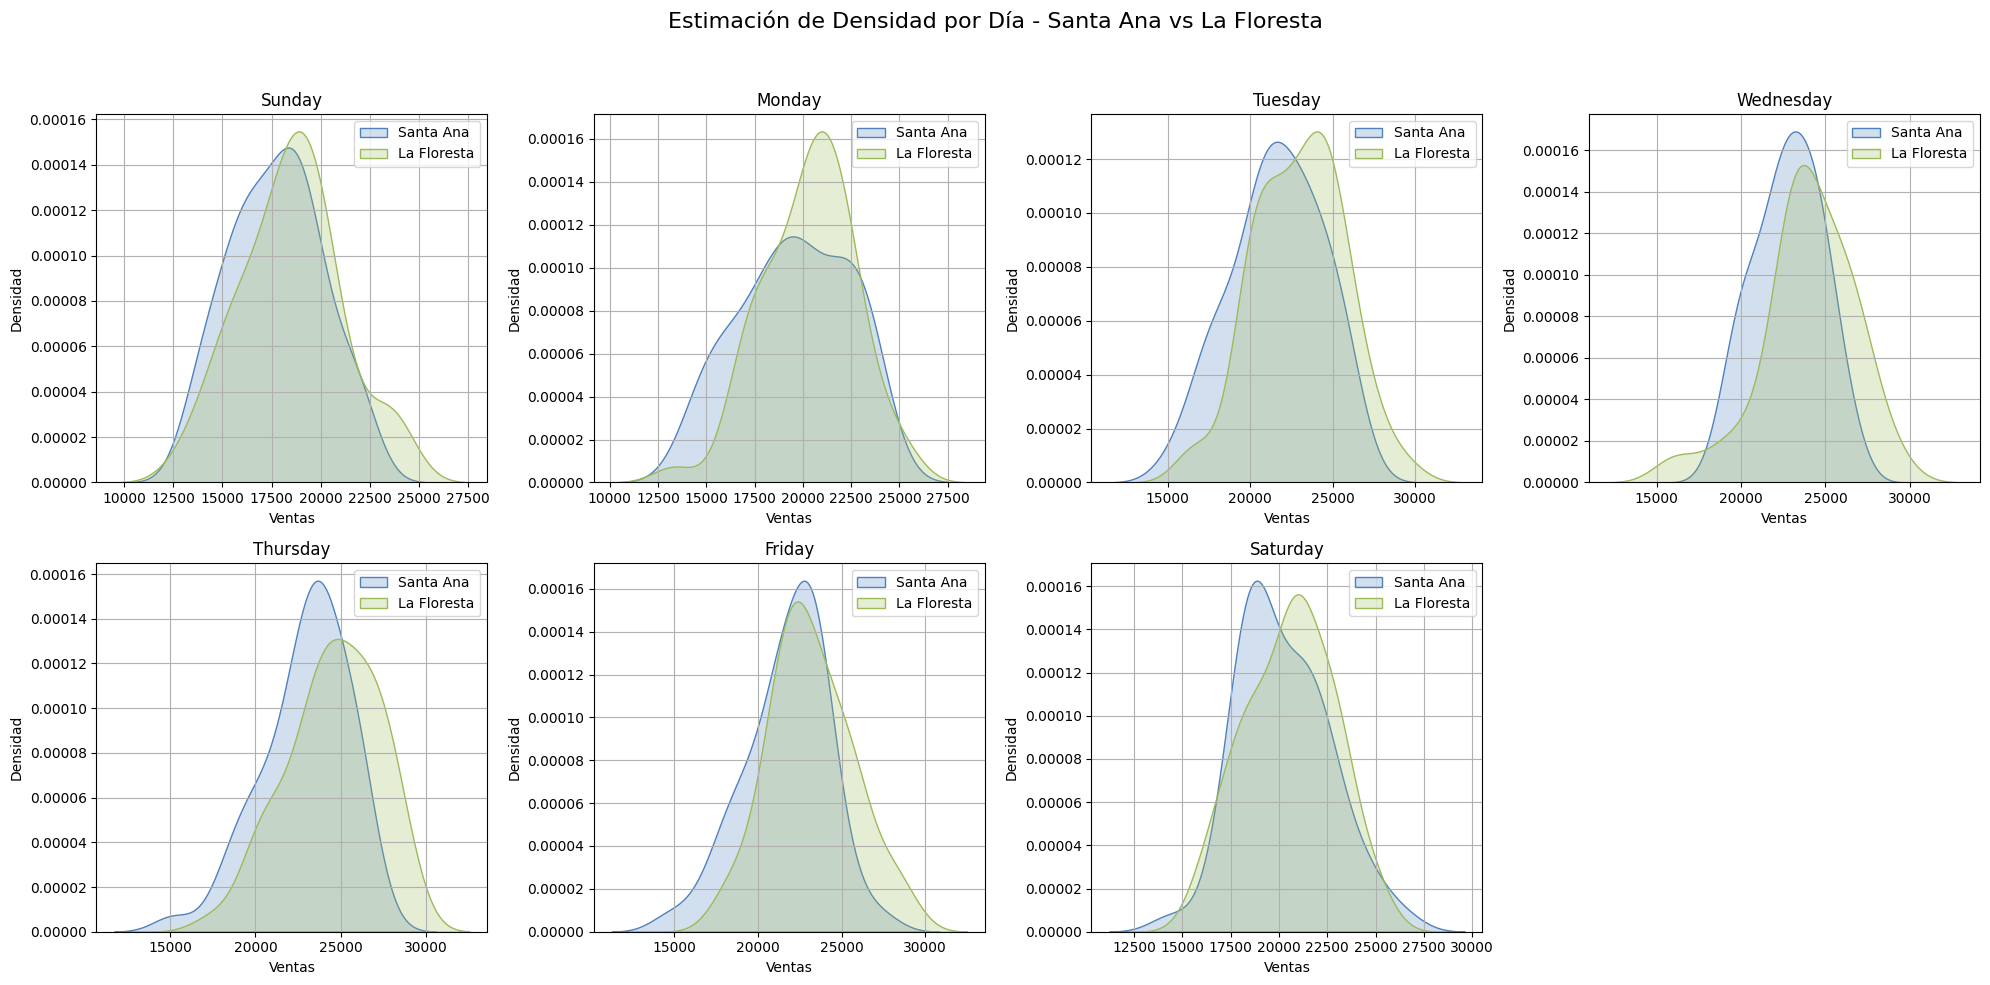

In [144]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Estimaci√≥n de Densidad por D√≠a - Santa Ana vs La Floresta", fontsize=16)

for i, dia in enumerate(dias):
    row, col = divmod(i, 4)
    ax = axs[row, col]

    sns.kdeplot(
        data=df_santa_ana[df_santa_ana['DiaSemana'] == dia],
        x='Ventas', label='Santa Ana', fill=True, ax=ax, color=colores[0]
    )
    sns.kdeplot(
        data=df_la_floresta[df_la_floresta['DiaSemana'] == dia],
        x='Ventas', label='La Floresta', fill=True, ax=ax, color=colores[1]
    )

    ax.set_title(dia)
    ax.set_xlabel('Ventas')
    ax.set_ylabel('Densidad')
    ax.grid(True)
    ax.legend(loc='upper right')

# Eliminar subplot vac√≠o si hay menos de 8
if len(dias) < 8:
    axs[1, 3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [145]:
def calcular_ice_por_dia(df, tienda, niveles=[0.95, 0.99]):
    df_tienda = df[df['Tienda'] == tienda]
    dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    filas = []

    for dia in dias:
        datos = df_tienda[df_tienda['DiaSemana'] == dia]['Ventas'].values
        fila = {'DiaSemana': dia}
        for nivel in niveles:
            alpha = 1 - nivel
            low = np.percentile(datos, alpha/2 * 100)
            high = np.percentile(datos, (1 - alpha/2) * 100)
            fila[f'ICE {int(nivel*100)}% Inferior'] = round(low, 2)
            fila[f'ICE {int(nivel*100)}% Superior'] = round(high, 2)
        filas.append(fila)

    return pd.DataFrame(filas)

In [146]:
ice_dia_santa_ana = calcular_ice_por_dia(df_santa_ana, 'Santa Ana')

ice_dia_santa_ana.head(7)

DiaSemana  ICE 95% Inferior  ICE 95% Superior  ICE 99% Inferior  \
0     Monday          14494.35          23611.21          14336.58   
1    Tuesday          16570.24          26037.80          15542.00   
2  Wednesday          19166.11          26177.96          18692.64   
3   Thursday          18031.07          26304.82          15828.22   
4     Friday          16613.64          25640.80          15098.67   
5   Saturday          16878.94          24819.74          15009.46   
6     Sunday          13724.81          22053.26          13568.38   

   ICE 99% Superior  
0          23700.54  
1          26242.67  
2          26709.62  
3          26952.30  
4          27012.49  
5          26030.36  
6          22109.97

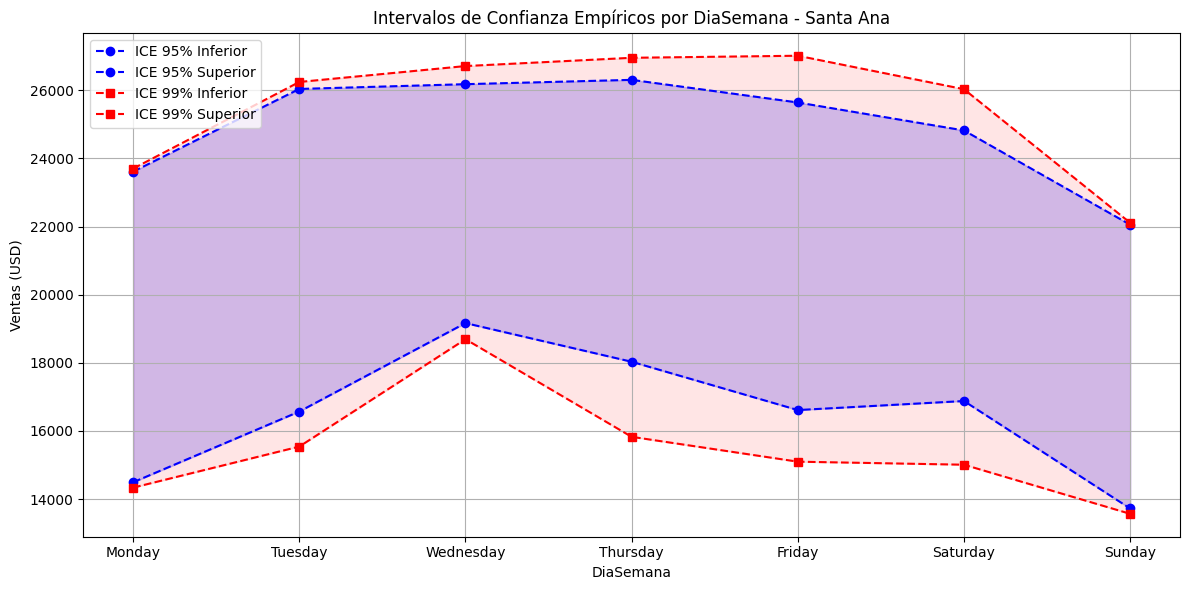

In [147]:
graficar_ice(ice_dia_santa_ana, 'Santa Ana', t = 'DiaSemana')

In [148]:
ice_dia_la_floresta = calcular_ice_por_dia(df_la_floresta, 'La Floresta')

ice_dia_la_floresta.head(7)

DiaSemana  ICE 95% Inferior  ICE 95% Superior  ICE 99% Inferior  \
0     Monday          16571.88          24623.79          14144.33   
1    Tuesday          17423.85          27583.32          16689.11   
2  Wednesday          17077.48          28243.88          15963.21   
3   Thursday          19724.03          28756.19          18048.85   
4     Friday          18630.52          28068.97          17981.57   
5   Saturday          16379.89          24746.19          16002.89   
6     Sunday          13916.48          23634.24          13161.52   

   ICE 99% Superior  
0          25206.29  
1          28915.67  
2          29128.02  
3          28905.43  
4          28851.75  
5          24980.42  
6          23991.89

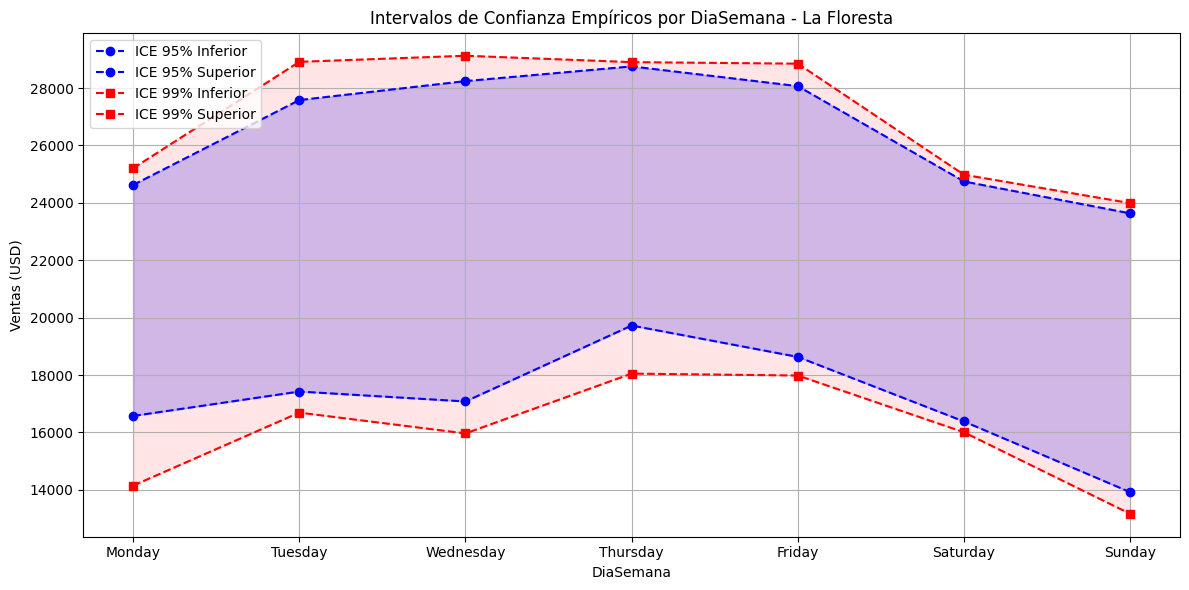

In [149]:
graficar_ice(ice_dia_la_floresta, 'La Floresta', t = 'DiaSemana')

**An√°lisis de Distribuciones Emp√≠ricas (ECDF)**

El an√°lisis de las funciones emp√≠ricas de distribuci√≥n revela patrones claros en el comportamiento semanal de las ventas para ambas tiendas:
- **Domingo** muestra ventas sistem√°ticamente m√°s bajas en ambas tiendas, con curvas ECDF muy empinadas y cercanas al origen, lo que indica menor variabilidad y un nivel bajo de ventas.
- **Jueves y viernes** presentan curvas ECDF m√°s desplazadas hacia la derecha, reflejando mayores ventas acumuladas, especialmente en Santa Ana.
- En **mi√©rcoles y jueves**, Santa Ana muestra mayor dispersi√≥n en su ECDF, mientras que La Floresta mantiene una forma m√°s constante, indicando una estructura de ventas m√°s estable.

**An√°lisis de Densidad Estimada (KDE)**

- **Santa Ana** presenta picos de densidad m√°s amplios y planos en algunos d√≠as (como lunes o mi√©rcoles), lo que sugiere mayor variabilidad diaria.
- **La Floresta**, en cambio, muestra curvas KDE m√°s estrechas y definidas durante la semana, especialmente de martes a jueves, lo cual refuerza la percepci√≥n de mayor estabilidad.
- En d√≠as como **s√°bado y domingo**, ambas tiendas presentan curvas m√°s concentradas, lo que indica una rutina m√°s predecible de consumo.

**Intervalos de Confianza Emp√≠ricos (ICE)**

- En t√©rminos de los intervalos de confianza del 95% y 99%, **La Floresta** tiende a tener ICE m√°s estrechos y ubicados en un rango superior al de Santa Ana durante **martes a viernes**, lo que sugiere no solo mayor volumen de ventas sino tambi√©n menor dispersi√≥n.
- **Santa Ana** muestra ICE m√°s amplios y variables en esos mismos d√≠as, lo que indica mayor incertidumbre operativa.
- Los **ICE del domingo** son los m√°s bajos y acotados en ambas tiendas, reafirmando que es el d√≠a de menor actividad.

**Conclusiones Final**
- **La Floresta** exhibe un patr√≥n semanal m√°s estable y predecible, con d√≠as fuertes en ventas entre semana (martes a viernes), y una variabilidad contenida.
- **Santa Ana** muestra una mayor dispersi√≥n diaria, especialmente entre mi√©rcoles y viernes, lo que puede reflejar tanto oportunidades de alto volumen como desaf√≠os de gesti√≥n.
- En t√©rminos operativos, **jueves y viernes** son los d√≠as clave para ambas tiendas, mientras que **domingo** es sistem√°ticamente el d√≠a m√°s d√©bil.

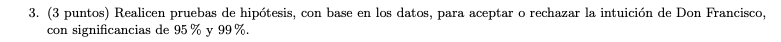

In [150]:
ventas_sa = df_santa_ana['Ventas']
ventas_lf = df_la_floresta['Ventas']

In [151]:
# C√°lculo de medias y desviaciones
media_sa = ventas_sa.mean()
std_sa = ventas_sa.std(ddof=1)
media_lf = ventas_lf.mean()
std_lf = ventas_lf.std(ddof=1)

print("üìä Estad√≠sticas generales:")
print(f"Santa Ana - Media: ${media_sa:.2f} | Desviaci√≥n est√°ndar: ${std_sa:.2f}")
print(f"La Floresta - Media: ${media_lf:.2f} | Desviaci√≥n est√°ndar: ${std_lf:.2f}")

# Comparaci√≥n simple
if media_lf < media_sa:
    print("\n‚úÖ La media de ventas de La Floresta es menor que la de Santa Ana.")
    diferencia = media_sa - media_lf
    print(f"La diferencia promedio es de ${diferencia:.2f} por d√≠a.")
else:
    print("\n‚ùå La media de ventas de La Floresta no es menor que la de Santa Ana.")


üìä Estad√≠sticas generales:
Santa Ana - Media: $20927.77 | Desviaci√≥n est√°ndar: $3013.34
La Floresta - Media: $21990.55 | Desviaci√≥n est√°ndar: $3274.75

‚ùå La media de ventas de La Floresta no es menor que la de Santa Ana.


**Demostracion de normalidad para aplicar prueba de hip√≥tesis**

In [152]:
def plot_sfo_traffic_analysis(data, numerical_columns, tienda):

    n = len(numerical_columns)
    fig, axs = plt.subplots(nrows=n, ncols=3, figsize=(15, 5 * n))

    # Si solo hay una fila, convertimos axs en 2D para indexar como axs[i, j]
    if n == 1:
        axs = np.array([axs])

    for i, column in enumerate(numerical_columns):
        # Histograma + KDE
        sns.histplot(data[column], kde=True, bins=30, ax=axs[i, 0])
        axs[i, 0].set_title(f'Histograma + KDE de {column} ({tienda})')
        axs[i, 0].set_xlabel(column)
        axs[i, 0].set_ylabel('Frecuencia')

        # Boxplot
        sns.boxplot(x=data[column], ax=axs[i, 1])
        axs[i, 1].set_title(f'Boxplot de {column} ({tienda})')
        axs[i, 1].set_xlabel(column)

        # Q-Q plot
        sm.qqplot(data[column], line='45', fit=True, ax=axs[i, 2])
        axs[i, 2].set_title(f'Q-Q Plot de {column} ({tienda})')

    plt.tight_layout()
    plt.show()

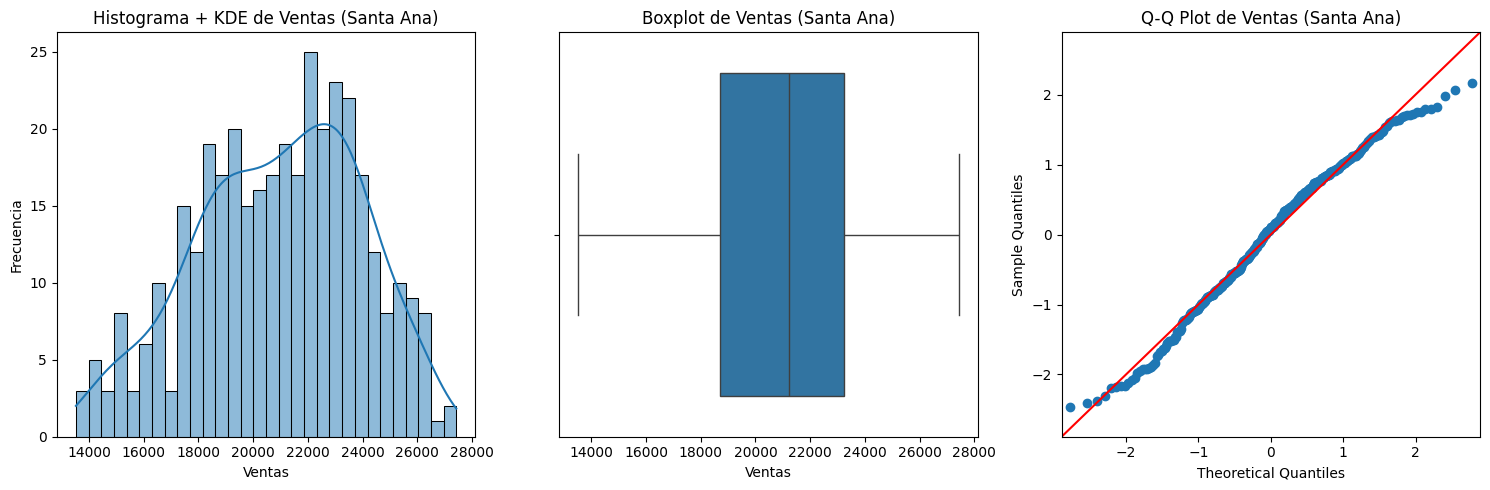

In [153]:
plot_sfo_traffic_analysis(df_santa_ana, ["Ventas"], 'Santa Ana')

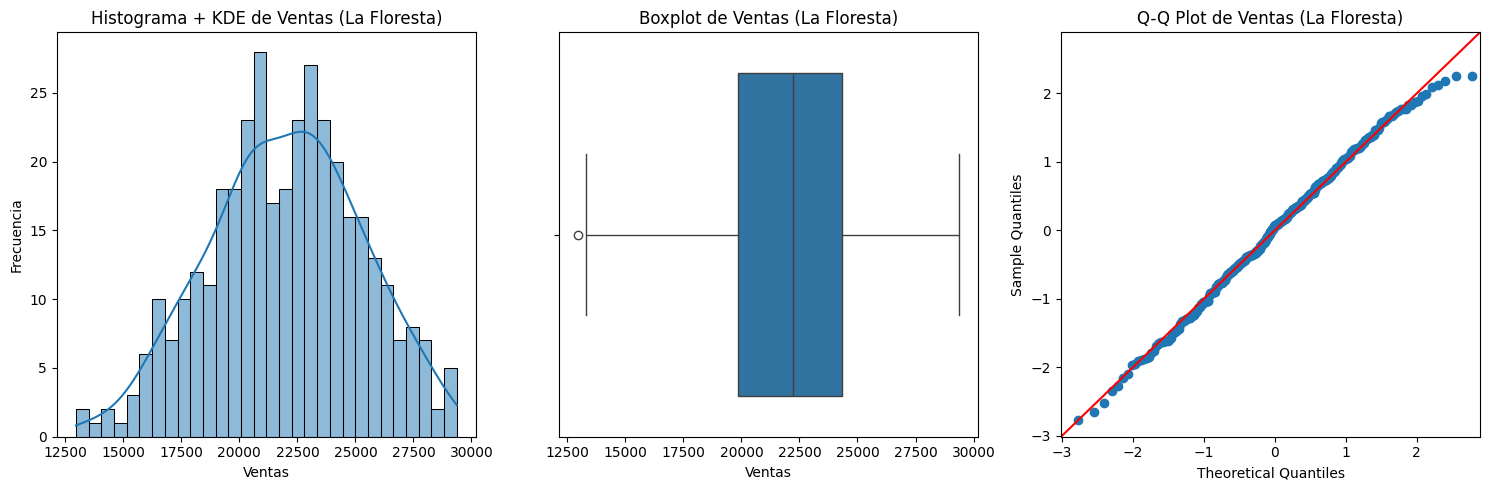

In [154]:
plot_sfo_traffic_analysis(df_la_floresta, ["Ventas"], 'La Floresta')

Queremos evaluar si la tienda **La Floresta** vende m√°s que **Santa Ana**, contrastando sus medias poblacionales.

Denotamos:
- $\mu_A$: media poblacional de Santa Ana  
- $\mu_B$: media poblacional de La Floresta

Las hip√≥tesis se formulan como:

- **Hip√≥tesis nula**: $H_0 : \mu_B \leq \mu_A$  
  (_No hay evidencia suficiente de que La Floresta venda m√°s que Santa Ana._)

- **Hip√≥tesis alternativa**: $H_1 : \mu_B > \mu_A$  
  (_La Floresta vende significativamente m√°s que Santa Ana._)

Este es un **test unilateral de cola derecha**, ya que nos interesa determinar si $\mu_B$ es mayor que $\mu_A$.

Rechazamos $H_0$ si el **valor $p$** es menor que el nivel de significancia $\alpha$ (por ejemplo, $\alpha = 0.05$ o $\alpha = 0.01$).

In [158]:
def comparar_promedios_tiendas(ventas_A, ventas_B, nombre_A='Tienda A', nombre_B='Tienda B', alpha=0.01):
    # Calcular medias
    mean_A = np.mean(ventas_A)
    mean_B = np.mean(ventas_B)

    # Calcular desviaciones est√°ndar muestrales
    std_A = np.std(ventas_A, ddof=1)
    std_B = np.std(ventas_B, ddof=1)

    # Tama√±os de muestra
    n_A = len(ventas_A)
    n_B = len(ventas_B)

    # Grados de libertad
    df = n_A + n_B - 2

    # Desviaci√≥n est√°ndar agrupada
    sp = np.sqrt(((n_A - 1) * std_A**2 + (n_B - 1) * std_B**2) / df)

    # Estad√≠stico t (comparamos si B > A)
    t_stat = (mean_B - mean_A) / (sp * np.sqrt(1/n_A + 1/n_B))

    # Valor cr√≠tico y p-valor unilateral
    t_critical = t_dist.ppf(1 - alpha, df)
    p_value = 1 - t_dist.cdf(t_stat, df)  # cola derecha

    # Resultados
    print(f"H0: Œº_{nombre_B} ‚â§ Œº_{nombre_A} vs H1: Œº_{nombre_B} > Œº_{nombre_A}")
    print(f"- Media {nombre_A}: {mean_A:.2f}")
    print(f"- Media {nombre_B}: {mean_B:.2f}")
    print(f"- t-statistic: {t_stat:.4f}")
    print(f"- Grados de libertad: {df}")
    print(f"- Valor cr√≠tico (Œ± = {alpha}): {t_critical:.4f}")
    print(f"- p-valor (unilateral): {p_value:.6f}")

    if p_value < alpha:
        print(f"\n‚úÖ Rechazamos la hip√≥tesis nula: {nombre_B} vende significativamente m√°s que {nombre_A}.")
    else:
        print(f"\n‚ùå No se rechaza la hip√≥tesis nula: No hay evidencia suficiente para afirmar que {nombre_B} vende m√°s que {nombre_A}.")

In [159]:
comparar_promedios_tiendas(
    ventas_A=df_santa_ana['Ventas'],
    ventas_B=df_la_floresta['Ventas'],
    nombre_A='Santa Ana',
    nombre_B='La Floresta',
    alpha=0.01  # para 99% de confianza
)

H0: Œº_La Floresta ‚â§ Œº_Santa Ana vs H1: Œº_La Floresta > Œº_Santa Ana
- Media Santa Ana: 20927.77
- Media La Floresta: 21990.55
- t-statistic: 4.5626
- Grados de libertad: 728
- Valor cr√≠tico (Œ± = 0.01): 2.3315
- p-valor (unilateral): 0.000003

‚úÖ Rechazamos la hip√≥tesis nula: La Floresta vende significativamente m√°s que Santa Ana.


In [160]:
comparar_promedios_tiendas(
    ventas_A=df_santa_ana['Ventas'],
    ventas_B=df_la_floresta['Ventas'],
    nombre_A='Santa Ana',
    nombre_B='La Floresta',
    alpha=0.05  # para 95% de confianza
)

H0: Œº_La Floresta ‚â§ Œº_Santa Ana vs H1: Œº_La Floresta > Œº_Santa Ana
- Media Santa Ana: 20927.77
- Media La Floresta: 21990.55
- t-statistic: 4.5626
- Grados de libertad: 728
- Valor cr√≠tico (Œ± = 0.05): 1.6469
- p-valor (unilateral): 0.000003

‚úÖ Rechazamos la hip√≥tesis nula: La Floresta vende significativamente m√°s que Santa Ana.


Existe **evidencia estad√≠stica s√≥lida** para afirmar que la tienda **La Floresta vende significativamente m√°s que Santa Ana** en promedio. Este resultado confirma la percepci√≥n inicial de Don Francisco, y puede respaldar decisiones comerciales o de inversi√≥n focalizadas en esa sucursal.

### Link al Notebook
Se puede encontrar el trabajo completo en el siguiente link: [Repositorio GitHub](https://github.com/abrilnoguera/TPFinal-PEIA)